#Lentic default parameters

##Libraries

Cargar paquetes

In [1]:
import pickle
import joblib
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import pandas as pd
import seaborn as sns
import geopandas as gpd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, matthews_corrcoef, roc_auc_score, jaccard_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##Database download

###Load dataset 2022

In [2]:
# Definir la URL para cargar el archivo Excel que contiene datos sobre contaminantes de aguas lénticas

#lentico_completo = pd.read_excel('/content/lentic_contaminants_2012-2022.xlsx')
url_lentico_completo = "https://raw.githubusercontent.com/Ricardo8932/Paper/main/Database/Lentic/lentic_contaminants_2012-2022_p.xlsx"
url_lentico_sites = "https://raw.githubusercontent.com/Ricardo8932/Paper/main/Database/Lentic/lentic_sites.xlsx"

In [3]:
# Cargar el DataFrame 'lentico' desde un archivo Excel en la URL especificada

lentico_completo = pd.read_excel(url_lentico_completo)
lentico_sites = pd.read_excel(url_lentico_sites)

###Load dataset 2023

In [4]:
# Definir la URL para cargar el archivo Excel que contiene datos sobre contaminantes de aguas lénticas

#url_lentico="https://raw.githubusercontent.com/Ricardo8932/Proyecto_Conagua_Final_Tesis/main/Lentico/al_2023/lentico_contaminantes.xlsx"

In [5]:
# Cargar el DataFrame 'lentico' desde un archivo Excel en la URL especificada

#lentico = pd.read_excel(url_lentico)

##Preprocessing

In [6]:
lentico = lentico_completo.copy()

In [7]:
# Obtener los índices (números de fila) del DataFrame 'lentico' y almacenarlos en la variable 'lentico_row_idx'
lentico_row_idx = lentico.index
lentico_row_idx

RangeIndex(start=0, stop=15427, step=1)

In [8]:
# Obtener los nombres de las columnas del DataFrame 'lentico' y almacenarlos en la variable 'lentico_col_idx'
lentico_col_idx = lentico.columns

# Mostrar los nombres de las columnas del DataFrame 'lentico'
lentico_col_idx


Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'AÑO', 'SST', 'CF',
       'E_COLI', 'ODs%', 'ODm%', 'ODf%', 'DBO5', 'DQO', 'TOX_D48s', 'TOX_D48f',
       'TOX_F15s', 'TOX_F15f'],
      dtype='object')

In [9]:
# Mostrar los tipos de datos de cada columna en el DataFrame 'lentico'
lentico.dtypes


,0
CLAVE SITIO,object
CLAVE MONITOREO,object
NOMBRE DEL SITIO,object
TIPO CUERPO DE AGUA,object
FECHA REALIZACIÓN,datetime64[ns]
AÑO,int64
SST,object
CF,object
E_COLI,object
ODs%,object


In [10]:
# Mostrar las primeras 5 filas del DataFrame 'lentico'
lentico.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f
0,DLAGU11,DLAGU11-021212,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2012-12-20,2012,<10,<3,<3,<10,<10,<10,2.34,19.776,<1,<1,<1,<1
1,DLAGU11,DLAGU11-140413,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2013-04-11,2013,<10,<1,<1,NaN,NaN,NaN,12.51,15.2,<1,<1,<1,<1
2,DLAGU11,DLAGU11-201013,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2013-10-17,2013,<10,285,<1,NaN,<10,<10,<2,41.976,<1,<1,<1,<1
3,DLAGU11,DLAGU11-090214,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2014-02-04,2014,<10,1728,86,137.9,61.8,36.5,9,35,<1,<1,<1,<1
4,DLAGU11,DLAGU11-100814,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2014-07-30,2014,<10,160,<1,102.1,37.5,28.7,4.2,44.74,<1,<1,<1,<1


In [11]:
# Contar el número de valores nulos en cada columna del DataFrame 'lentico'
lentico.isnull().sum()

,0
CLAVE SITIO,0
CLAVE MONITOREO,0
NOMBRE DEL SITIO,0
TIPO CUERPO DE AGUA,0
FECHA REALIZACIÓN,0
AÑO,0
SST,252
CF,348
E_COLI,2065
ODs%,2089


In [12]:
# Mostrar un resumen conciso del DataFrame 'lentico'
lentico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15427 entries, 0 to 15426
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          15427 non-null  object        
 1   CLAVE MONITOREO      15427 non-null  object        
 2   NOMBRE DEL SITIO     15427 non-null  object        
 3   TIPO CUERPO DE AGUA  15427 non-null  object        
 4   FECHA REALIZACIÓN    15427 non-null  datetime64[ns]
 5   AÑO                  15427 non-null  int64         
 6   SST                  15175 non-null  object        
 7   CF                   15079 non-null  object        
 8   E_COLI               13362 non-null  object        
 9   ODs%                 13338 non-null  object        
 10  ODm%                 8305 non-null   object        
 11  ODf%                 7746 non-null   object        
 12  DBO5                 13532 non-null  object        
 13  DQO                  13391 non-

In [13]:
# Obtener los nombres de las columnas del DataFrame 'lentico'
columns = lentico.columns.values

# Reemplazar caracteres específicos en todas las columnas del DataFrame
lentico[columns] = lentico[columns].replace({'<':''}, regex=True)  # Eliminar el símbolo '<'
lentico[columns] = lentico[columns].replace({'>':''}, regex=True)  # Eliminar el símbolo '>'
lentico[columns] = lentico[columns].replace({'≤':''}, regex=True)  # Eliminar el símbolo '≤'
lentico[columns] = lentico[columns].replace({'≥':''}, regex=True)  # Eliminar el símbolo '≥'

In [14]:
# Mostrar las primeras 5 filas del DataFrame 'lentico' para verificar si se han eliminado los signos '<, ≤' y '>, ≥'
lentico.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f
0,DLAGU11,DLAGU11-021212,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2012-12-20,2012,10,3,3,10,10,10,2.34,19.776,1,1,1,1
1,DLAGU11,DLAGU11-140413,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2013-04-11,2013,10,1,1,NaN,NaN,NaN,12.51,15.2,1,1,1,1
2,DLAGU11,DLAGU11-201013,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2013-10-17,2013,10,285,1,NaN,10,10,2,41.976,1,1,1,1
3,DLAGU11,DLAGU11-090214,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2014-02-04,2014,10,1728,86,137.9,61.8,36.5,9,35,1,1,1,1
4,DLAGU11,DLAGU11-100814,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LÉNTICO,2014-07-30,2014,10,160,1,102.1,37.5,28.7,4.2,44.74,1,1,1,1


In [15]:
# Seleccionar las columnas del DataFrame 'lentico' que se desean convertir a tipo numérico (índices del 6 al 17)
columns_to_convert = lentico.columns[6:18]

# Convertir las columnas seleccionadas a tipo numérico; cualquier valor que no pueda ser convertido se convertirá en NaN
lentico[columns_to_convert] = lentico[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [16]:
# Seleccionar las columnas del DataFrame 'lentico' desde la columna 13 hasta la 24 (excluyendo la 25) usando iloc
selected_columns = lentico.iloc[:, 6:18]

# Mostrar las primeras 10 filas del DataFrame 'selected_columns'
selected_columns.head(10)


,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f
0,10.0,3.0,3.0,10.0,10.0,10.0,2.34,19.776,1.0,1.0,1.0,1.0
1,10.0,1.0,1.0,NaN,NaN,NaN,12.51,15.200,1.0,1.0,1.0,1.0
2,10.0,285.0,1.0,NaN,10.0,10.0,2.00,41.976,1.0,1.0,1.0,1.0
3,10.0,1728.0,86.0,137.9,61.8,36.5,9.00,35.000,1.0,1.0,1.0,1.0
4,10.0,160.0,1.0,102.1,37.5,28.7,4.20,44.740,1.0,1.0,1.0,1.0
5,10.0,63.0,1.0,114.6,37.0,37.0,2.00,10.000,1.0,1.0,1.0,1.0
6,10.0,426.0,1.0,115.6,26.4,30.8,4.66,36.790,1.0,1.0,1.0,1.0
7,10.0,148.0,1.0,104.3,66.0,27.1,2.00,10.000,1.0,1.0,1.0,1.0
8,10.0,148.0,1.0,99.4,98.3,99.2,2.00,22.570,1.0,1.0,1.0,1.0
9,10.0,52.0,1.0,114.0,63.3,36.2,4.04,36.810,1.0,1.0,1.0,1.0


In [17]:
# Mostrar información general sobre el DataFrame 'lentico'
lentico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15427 entries, 0 to 15426
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          15427 non-null  object        
 1   CLAVE MONITOREO      15427 non-null  object        
 2   NOMBRE DEL SITIO     15427 non-null  object        
 3   TIPO CUERPO DE AGUA  15427 non-null  object        
 4   FECHA REALIZACIÓN    15427 non-null  datetime64[ns]
 5   AÑO                  15427 non-null  int64         
 6   SST                  15175 non-null  float64       
 7   CF                   15078 non-null  float64       
 8   E_COLI               13362 non-null  float64       
 9   ODs%                 13338 non-null  float64       
 10  ODm%                 8305 non-null   float64       
 11  ODf%                 7746 non-null   float64       
 12  DBO5                 13532 non-null  float64       
 13  DQO                  13384 non-

In [18]:
# Cambiar el tipo de datos de las columnas 'AÑO', 'LATITUD' y 'LONGITUD' a 'object' en el DataFrame 'lentico'
lentico = lentico.astype({'AÑO':'object','FECHA REALIZACIÓN':'object'})

In [19]:
# Obtener estadísticas descriptivas de las columnas numéricas del DataFrame 'lentico'
lentico.describe()

,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f
count,15175.000000,1.507800e+04,1.336200e+04,13338.000000,8305.000000,7746.000000,13532.000000,13384.000000,13243.000000,10152.000000,14860.000000,11251.000000
mean,41.045472,5.761521e+03,1.196096e+03,84.723771,68.880623,58.732522,8.388159,47.124951,1.011664,1.003026,1.049001,1.042294
std,141.219870,2.157159e+05,1.573284e+04,30.979843,29.564981,31.206004,18.212042,84.752352,0.358631,0.128795,0.997475,0.733594
min,10.000000,0.000000e+00,1.000000e+00,10.000000,10.000000,1.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000
25%,10.000000,3.000000e+01,3.000000e+00,64.100000,48.100000,32.500000,2.000000,15.000000,1.000000,1.000000,1.000000,1.000000
50%,14.000000,1.870000e+02,2.000000e+01,88.200000,70.900000,57.800000,3.345000,30.042000,1.000000,1.000000,1.000000,1.000000
75%,33.500000,1.500000e+03,9.000000e+01,103.500000,91.600000,85.000000,8.000000,52.000000,1.000000,1.000000,1.000000,1.000000
max,7150.000000,2.400000e+07,1.200000e+06,210.200000,150.000000,208.500000,511.000000,2923.000000,21.320000,12.210000,100.000000,55.248619


In [20]:
# Selecciona las columnas 6 a 17
columnas_especificas = lentico.iloc[:, 6:18]

# Aplica dropna() solo a esas columnas
lentico_preprocesado = lentico.dropna(subset=columnas_especificas.columns)

In [21]:
# Mostrar información resumida sobre el DataFrame 'lentico'
lentico_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

In [22]:
# Guardar el DataFrame 'lentico' en un archivo Excel llamado 'lentico_preprocesado.xlsx'
lentico_preprocesado.to_excel("lentico_preprocesado.xlsx")

##Water quality

###Funciones para las columnas 'calidad_' y 'cumple_'


In [23]:
# Crea un nuevo DataFrame 'data_lentico' asignando valores NaN a las columnas para la calidad del agua y el cumplimiento de cada contaminante
data_lentico = lentico_preprocesado.assign(calidad_SST=np.nan,calidad_CF=np.nan,calidad_E_COLI=np.nan,calidad_ODs=np.nan,calidad_ODm=np.nan,calidad_ODf=np.nan,calidad_DBO5=np.nan,calidad_DQO=np.nan,calidad_TOX_D48s=np.nan,calidad_TOX_D48f=np.nan,calidad_TOX_F15s=np.nan,calidad_TOX_F15f=np.nan,
                                cumple_SST=np.nan,cumple_CF=np.nan,cumple_E_COLI=np.nan,cumple_ODs=np.nan,cumple_ODm=np.nan,cumple_ODf=np.nan, cumple_DBO5=np.nan,cumple_DQO=np.nan,cumple_TOX_D48s=np.nan,cumple_TOX_D48f=np.nan,cumple_TOX_F15s=np.nan,cumple_TOX_F15f=np.nan)

In [24]:
data_lentico.columns

Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'AÑO', 'SST', 'CF',
       'E_COLI', 'ODs%', 'ODm%', 'ODf%', 'DBO5', 'DQO', 'TOX_D48s', 'TOX_D48f',
       'TOX_F15s', 'TOX_F15f', 'calidad_SST', 'calidad_CF', 'calidad_E_COLI',
       'calidad_ODs', 'calidad_ODm', 'calidad_ODf', 'calidad_DBO5',
       'calidad_DQO', 'calidad_TOX_D48s', 'calidad_TOX_D48f',
       'calidad_TOX_F15s', 'calidad_TOX_F15f', 'cumple_SST', 'cumple_CF',
       'cumple_E_COLI', 'cumple_ODs', 'cumple_ODm', 'cumple_ODf',
       'cumple_DBO5', 'cumple_DQO', 'cumple_TOX_D48s', 'cumple_TOX_D48f',
       'cumple_TOX_F15s', 'cumple_TOX_F15f'],
      dtype='object')

In [25]:
# Mostrar información general sobre las nuevas columnas agregadas al DataFrame data_lentico
data_lentico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

Función para la columna calidad_

In [26]:
#---------------------------calidad_SST---------------------------------------------------------------------------------
col = 'SST'
conditions  = [ data_lentico[col] <= 25, (data_lentico[col] > 25) & (data_lentico[col] <= 75), (data_lentico[col] > 75) & (data_lentico[col] <= 150), (data_lentico[col] > 150) & (data_lentico[col] <= 400), data_lentico[col] > 400 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_SST'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_CF-------------------------------------------------------------------
col = 'CF'
conditions  = [ data_lentico[col] <= 100, (data_lentico[col] > 100) & (data_lentico[col] <= 200), (data_lentico[col] > 200) & (data_lentico[col] <= 1000), (data_lentico[col] > 1000) & (data_lentico[col] <= 10000), data_lentico[col] > 10000 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_CF'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_E_COLI--------------------------------------------------------------------------------
col = 'E_COLI'
conditions  = [ data_lentico[col] <= 126, (data_lentico[col] > 126) & (data_lentico[col] <= 576), (data_lentico[col] > 576) & (data_lentico[col] <= 850), (data_lentico[col] > 850) & (data_lentico[col] <= 1000), data_lentico[col] > 1000 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_E_COLI'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_ODs-------------------------------------------------------------------------
col = 'ODs%'
conditions  = [ (data_lentico[col] > 70) & (data_lentico[col] <= 110),
                (((data_lentico[col] > 50) & (data_lentico[col] <= 70))|((data_lentico[col] > 110)&(data_lentico[col] <= 120))),
                (((data_lentico[col] > 30) & (data_lentico[col] <= 50))|((data_lentico[col] > 120)&(data_lentico[col] <= 130))),
                (((data_lentico[col] > 10) & (data_lentico[col] <= 30))|((data_lentico[col] > 130)&(data_lentico[col] <= 150))),
                ((data_lentico[col] <= 10)|(data_lentico[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_ODs'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_ODm-------------------------------------------------------------------------
col = 'ODm%'
conditions  = [ (data_lentico[col] > 70) & (data_lentico[col] <= 110),
                (((data_lentico[col] > 50) & (data_lentico[col] <= 70))|((data_lentico[col] > 110)&(data_lentico[col] <= 120))),
                (((data_lentico[col] > 30) & (data_lentico[col] <= 50))|((data_lentico[col] > 120)&(data_lentico[col] <= 130))),
                (((data_lentico[col] > 10) & (data_lentico[col] <= 30))|((data_lentico[col] > 130)&(data_lentico[col] <= 150))),
                ((data_lentico[col] <= 10)|(data_lentico[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_ODm'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_ODf-------------------------------------------------------------------------
col = 'ODf%'
conditions  = [ (data_lentico[col] > 70) & (data_lentico[col] <= 110),
                (((data_lentico[col] > 50) & (data_lentico[col] <= 70))|((data_lentico[col] > 110)&(data_lentico[col] <= 120))),
                (((data_lentico[col] > 30) & (data_lentico[col] <= 50))|((data_lentico[col] > 120)&(data_lentico[col] <= 130))),
                (((data_lentico[col] > 10) & (data_lentico[col] <= 30))|((data_lentico[col] > 130)&(data_lentico[col] <= 150))),
                ((data_lentico[col] <= 10)|(data_lentico[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_ODf'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_DBO5-----------------------------------------------------
col = 'DBO5'
conditions  = [ data_lentico[col] <= 3, (data_lentico[col] > 3) & (data_lentico[col] <= 6), (data_lentico[col] > 6) & (data_lentico[col] <= 30),  (data_lentico[col] > 30) & (data_lentico[col] <= 120), data_lentico[col] > 120]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_DBO5'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_DQO------------------------------------------------------
col = 'DQO'
conditions  = [ data_lentico[col] <= 10, (data_lentico[col] > 10) & (data_lentico[col] <= 20), (data_lentico[col] > 20) & (data_lentico[col] <= 40), (data_lentico[col] > 40) & (data_lentico[col] <= 200), data_lentico[col] > 200 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lentico['calidad_DQO'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_D48s---------------------------------------------------------------------
col = 'TOX_D48s'
conditions  = [(data_lentico[col] < 1), (data_lentico[col] >= 1) & (data_lentico[col] <= 1.33), (data_lentico[col] > 1.33) & (data_lentico[col] < 5), data_lentico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lentico['calidad_TOX_D48s'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_D48f---------------------------------------------------------------------
col = 'TOX_D48f'
conditions  = [(data_lentico[col] < 1), (data_lentico[col] >= 1) & (data_lentico[col] <= 1.33), (data_lentico[col] > 1.33) & (data_lentico[col] < 5), data_lentico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lentico['calidad_TOX_D48f'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_F15s---------------------------------------------------------------------
col = 'TOX_F15s'
conditions  = [(data_lentico[col] < 1), (data_lentico[col] >= 1) & (data_lentico[col] <= 1.33), (data_lentico[col] > 1.33) & (data_lentico[col] < 5), data_lentico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lentico['calidad_TOX_F15s'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_F15f---------------------------------------------------------------------
col = 'TOX_F15f'
conditions  = [(data_lentico[col] < 1), (data_lentico[col] >= 1) & (data_lentico[col] <= 1.33), (data_lentico[col] > 1.33) & (data_lentico[col] < 5), data_lentico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lentico['calidad_TOX_F15f'] = np.select(conditions, choices, default=np.nan)

In [27]:
data_lentico.iloc[:5, 18:30] #Columnas tipo de calidad_

,calidad_SST,calidad_CF,calidad_E_COLI,calidad_ODs,calidad_ODm,calidad_ODf,calidad_DBO5,calidad_DQO,calidad_TOX_D48s,calidad_TOX_D48f,calidad_TOX_F15s,calidad_TOX_F15f
0,Excelente,Excelente,Excelente,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Excelente,Buena calidad,Toxicidad baja,Toxicidad baja,Toxicidad baja,Toxicidad baja
3,Excelente,Contaminada,Excelente,Contaminada,Buena calidad,Aceptable,Aceptable,Aceptable,Toxicidad baja,Toxicidad baja,Toxicidad baja,Toxicidad baja
4,Excelente,Buena calidad,Excelente,Excelente,Aceptable,Contaminada,Buena calidad,Contaminada,Toxicidad baja,Toxicidad baja,Toxicidad baja,Toxicidad baja
5,Excelente,Excelente,Excelente,Buena calidad,Aceptable,Aceptable,Excelente,Excelente,Toxicidad baja,Toxicidad baja,Toxicidad baja,Toxicidad baja
6,Excelente,Aceptable,Excelente,Buena calidad,Contaminada,Aceptable,Buena calidad,Aceptable,Toxicidad baja,Toxicidad baja,Toxicidad baja,Toxicidad baja


In [28]:
data_lentico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

Función para la columna cumple_

In [29]:
#---------------------------cumple_SST-----------------------------------------------------
col = 'calidad_SST'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_SST'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_SST'] = data_lentico['cumple_SST'].astype('int32')

#---------------------------cumple_CF-----------------------------------------------------
col = 'calidad_CF'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_CF'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_CF'] = data_lentico['cumple_CF'].astype('int32')

#---------------------------cumple_E_COLI-----------------------------------------------------
col = 'calidad_E_COLI'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_E_COLI'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_E_COLI'] = data_lentico['cumple_E_COLI'].astype('int32')

#---------------------------cumple_ODs-----------------------------------------------------
col = 'calidad_ODs'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_ODs'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_ODs'] = data_lentico['cumple_ODs'].astype('int32')

#---------------------------cumple_ODm-----------------------------------------------------
col = 'calidad_ODm'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_ODm'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_ODm'] = data_lentico['cumple_ODm'].astype('int32')

#---------------------------cumple_ODf-----------------------------------------------------
col = 'calidad_ODf'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_ODf'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_ODf'] = data_lentico['cumple_ODf'].astype('int32')

#---------------------------cumple_DBO5-----------------------------------------------------
col = 'calidad_DBO5'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_DBO5'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_DBO5'] = data_lentico['cumple_DBO5'].astype('int32')

#---------------------------cumple_DQO-----------------------------------------------------
col = 'calidad_DQO'
conditions  = [ data_lentico[col] == 'Excelente', data_lentico[col] == 'Buena calidad', data_lentico[col] == 'Aceptable', data_lentico[col] == 'Contaminada', data_lentico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lentico['cumple_DQO'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_DQO'] = data_lentico['cumple_DQO'].astype('int32')

#---------------------------cumple_TOX_D48s-----------------------------------------------------
col = 'calidad_TOX_D48s'
conditions  = [ data_lentico[col] == 'No tóxico', data_lentico[col] == 'Toxicidad baja', data_lentico[col] == 'Toxicidad moderada', data_lentico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lentico['cumple_TOX_D48s'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_TOX_D48s'] = data_lentico['cumple_TOX_D48s'].astype('int32')

#---------------------------cumple_TOX_D48f-----------------------------------------------------
col = 'calidad_TOX_D48f'
conditions  = [ data_lentico[col] == 'No tóxico', data_lentico[col] == 'Toxicidad baja', data_lentico[col] == 'Toxicidad moderada', data_lentico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lentico['cumple_TOX_D48f'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_TOX_D48f'] = data_lentico['cumple_TOX_D48f'].astype('int32')

#---------------------------cumple_TOX_F15s-----------------------------------------------------
col = 'calidad_TOX_F15s'
conditions  = [ data_lentico[col] == 'No tóxico', data_lentico[col] == 'Toxicidad baja', data_lentico[col] == 'Toxicidad moderada', data_lentico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lentico['cumple_TOX_F15s'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_TOX_F15s'] = data_lentico['cumple_TOX_F15s'].astype('int32')

#---------------------------cumple_TOX_F15f-----------------------------------------------------
col = 'calidad_TOX_F15f'
conditions  = [ data_lentico[col] == 'No tóxico', data_lentico[col] == 'Toxicidad baja', data_lentico[col] == 'Toxicidad moderada', data_lentico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lentico['cumple_TOX_F15f'] = np.select(conditions, choices, default=np.nan)
data_lentico['cumple_TOX_F15f'] = data_lentico['cumple_TOX_F15f'].astype('int32')

In [30]:
data_lentico.iloc[:5, 30:] #columnas de tipo cumple_

,cumple_SST,cumple_CF,cumple_E_COLI,cumple_ODs,cumple_ODm,cumple_ODf,cumple_DBO5,cumple_DQO,cumple_TOX_D48s,cumple_TOX_D48f,cumple_TOX_F15s,cumple_TOX_F15f
0,1,1,1,0,0,0,1,1,1,1,1,1
3,1,0,1,0,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,0,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,0,1,1,1,1,1,1,1


In [31]:
data_lentico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

Asignación de la calidad del agua

In [32]:
conditions  = [(data_lentico['cumple_DBO5'] == 0) | (data_lentico['cumple_DQO'] == 0) | (data_lentico['cumple_TOX_D48s'] == 0) | (data_lentico['cumple_TOX_D48f'] == 0) | (data_lentico['cumple_TOX_F15s'] == 0) | (data_lentico['cumple_TOX_F15f'] == 0),
               (data_lentico['cumple_E_COLI'] == 0) | (data_lentico['cumple_CF'] == 0) | (data_lentico['cumple_SST'] == 0) | (data_lentico['cumple_ODs'] == 0) | (data_lentico['cumple_ODm'] == 0) | (data_lentico['cumple_ODf'] == 0),
               (data_lentico['cumple_DBO5'] == 1) & (data_lentico['cumple_DQO'] == 1) & (data_lentico['cumple_SST'] == 1) & (data_lentico['cumple_CF'] == 1) & (data_lentico['cumple_E_COLI'] == 1) & (data_lentico['cumple_ODs'] == 1) & (data_lentico['cumple_ODm'] == 1) & (data_lentico['cumple_ODf'] == 1) & (data_lentico['cumple_TOX_D48s'] == 1) & (data_lentico['cumple_TOX_D48f'] == 1) & (data_lentico['cumple_TOX_F15s'] == 1) & (data_lentico['cumple_TOX_F15f'] == 1)]
choices     = [2, 1, 0]
data_lentico['Calidad del agua'] = np.select(conditions, choices, default=np.nan)
data_lentico['Calidad del agua'] = data_lentico['Calidad del agua'].astype('int32')

In [33]:
data_lentico.iloc[:5, 30:]

,cumple_SST,cumple_CF,cumple_E_COLI,cumple_ODs,cumple_ODm,cumple_ODf,cumple_DBO5,cumple_DQO,cumple_TOX_D48s,cumple_TOX_D48f,cumple_TOX_F15s,cumple_TOX_F15f,Calidad del agua
0,1,1,1,0,0,0,1,1,1,1,1,1,1
3,1,0,1,0,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,0,1,1,1,1,2
5,1,1,1,1,1,1,1,1,1,1,1,1,0
6,1,1,1,1,0,1,1,1,1,1,1,1,1


In [34]:
data_lentico.to_excel("lentico_contaminantes_calidad_cumple_calidad_del_agua.xlsx")

In [35]:
df_lentico_calidad_del_agua = data_lentico.iloc[:, list(range(0, 18)) + [42]]
df_lentico_calidad_del_agua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

In [36]:
df_lentico_calidad_del_agua.to_excel("lentico_contaminantes_calidad_del_agua.xlsx")

##Separation by years

In [37]:
lentico_sp = lentico_completo.copy()

In [38]:
lentico_p = lentico_preprocesado.copy()

Sin procesar

In [39]:
df_total_sp = pd.DataFrame(lentico_sp)

# Contar datos por año
conteo_por_año = df_total_sp['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2018    2695
2013    2094
2014    1947
2015    1920
2016    1886
2017    1873
2020     779
2019     772
2012     659
2022     476
2021     326
Name: count, dtype: int64


In [40]:
# Obtener el número de registros
numero_de_registros_sp = df_total_sp.shape[0]

print(f"El número total de registros del dataframe es: {numero_de_registros_sp}")

El número total de registros del dataframe es: 15427


Procesado

In [41]:
df_total_p = pd.DataFrame(lentico_p)

# Contar datos por año
conteo_por_año = df_total_p['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2018    1109
2014     943
2015     891
2016     833
2017     810
2019     344
2012     224
2022     126
2013      97
2021      52
Name: count, dtype: int64


In [42]:
# Obtener el número de registros
numero_de_registros_p = df_total_p.shape[0]

print(f"El número total de registros del dataframe es: {numero_de_registros_p}")

El número total de registros del dataframe es: 5429


Calidad del agua

In [43]:
df_lentico_calidad_del_agua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5429 entries, 0 to 15328
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   float

In [44]:
df_total_calidad = pd.DataFrame(df_lentico_calidad_del_agua)

# Contar datos por año
conteo_por_año = df_total_calidad['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2018    1109
2014     943
2015     891
2016     833
2017     810
2019     344
2012     224
2022     126
2013      97
2021      52
Name: count, dtype: int64


###al año 2021

####Calidad del agua

In [45]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_lentico_calidad_del_agua_2021 = df_lentico_calidad_del_agua[(df_lentico_calidad_del_agua['AÑO'] >= 2012) & (df_lentico_calidad_del_agua['AÑO'] <= 2021)]

In [46]:
df_lentico_calidad_del_agua_2021 = df_lentico_calidad_del_agua_2021.iloc[:, 6:21]

####Sin procesar

In [47]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_2012_al_2021_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2021)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2021_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2021 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2021 es: 14951


####Procesado

In [48]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_2012_al_2021_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2021)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2021_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2021 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2021 es: 5303


###al año 2022

####Sin procesar

In [49]:
# Filtrar valores entre 2012 y 2022 (inclusive)
df_2012_al_2022_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2022)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2022_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2022 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2022 es: 15427


Total de registros limpios del periodo 2012-2022

####Procesado

In [50]:
# Filtrar valores entre 2012 y 2022 (inclusive)
df_2012_al_2022_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2022)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2022_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2022 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2022 es: 5429


###al año 2023

####Sin procesar

In [51]:
# Filtrar valores entre 2012 y 2023 (inclusive)
df_2012_al_2023_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2023)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2023_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2023 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2023 es: 15427


####Procesado

In [52]:
# Filtrar valores entre 2012 y 2023 (inclusive)
df_2012_al_2023_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2023)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2023_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2023 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2023 es: 5429


##Exploratory Data Analysis (EDA)

In [53]:
# Imprimir un mensaje que indica que se mostrará el total de datos del periodo 2012-2023
print("Total de datos del periodo 2012 - 2023: ")

# Mostrar las dimensiones del DataFrame 'lentico' (filas y columnas) como una forma de entender el tamaño del conjunto de datos
lentico.shape

Total de datos del periodo 2012 - 2023: 


(15427, 18)

In [54]:
# Suponiendo que tu DataFrame se llama df
conteo_2023 = lentico[lentico['AÑO'] == 2023].shape[0]
print(f"El número de registros con AÑO 2023 es: {conteo_2023}")

El número de registros con AÑO 2023 es: 0


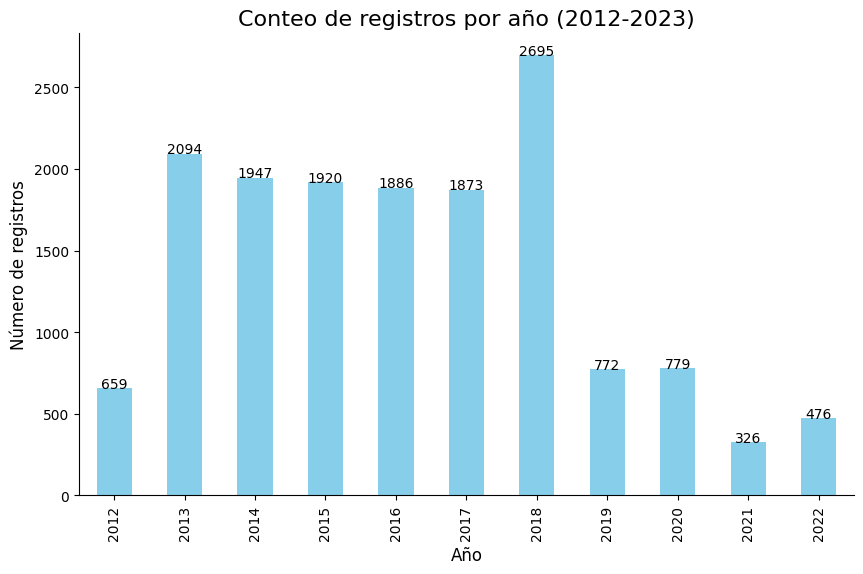

In [55]:
# Agrupar los datos por 'AÑO' y contar cuántos registros hay por cada año
conteo_por_año = lentico['AÑO'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_año.plot(kind='bar', color='skyblue')

# Configurar el título y las etiquetas de los ejes
plt.title('Conteo de registros por año (2012-2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de registros', fontsize=12)

# Mostrar los valores de las barras encima de cada barra
for index, value in enumerate(conteo_por_año):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar el gráfico
plt.show()


In [56]:
#Codigo para sacar el total de muestras descargadas
#solo del 2012 al 2021, el conjunto de datos es del 2012 al 2023
#por lo tanto se tiene que excluir el año 2022 y el 2023 y crear
#un nuevo dataframe que se llame lentico_2012_2021 y obtendremos
#el total de muestras de ese periodo

In [57]:
#Despues de ese conjunto de datos se crea un dataframe que llamaremos
#lentico_2012_2021 y a ese dataframe hay que aplicarle el
#dropna para que nos de el resultado de total de muestras limpias

###Otras estadisticas

In [58]:
# Agrupar por año y contar los valores de la columna "Water quality" para cada grupo
conteo_por_año = df_lentico_calidad_del_agua.groupby('AÑO')['Calidad del agua'].value_counts().unstack(fill_value=0)

# Definir los nombres de las columnas
nombres_columnas = ['Good', 'Regular', 'Poor']

# Asignar los nombres a las columnas del dataframe
conteo_por_año.columns = nombres_columnas

# Mostrar el resultado
conteo_por_año

,Good,Regular,Poor
AÑO,,,
2012,111,47,66
2013,34,22,41
2014,330,214,399
2015,397,306,188
2016,390,303,140
2017,366,264,180
2018,522,310,277
2019,166,89,89
2021,9,15,28


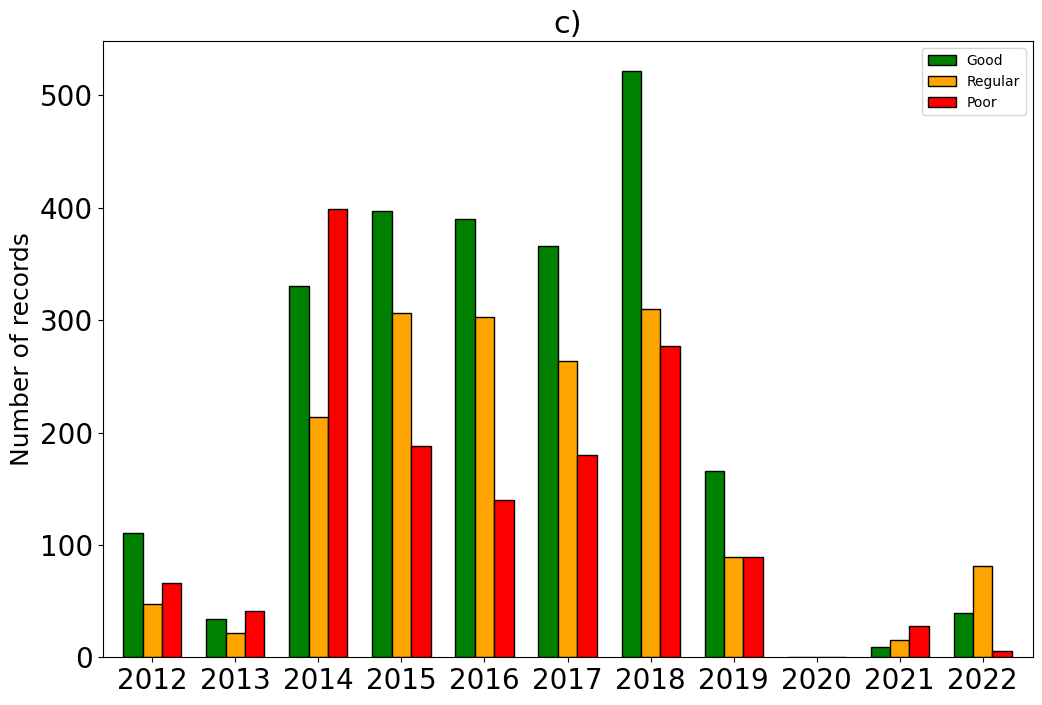

In [59]:
# Crear el DataFrame con tus datos
data = conteo_por_año  # Esto asume que ya tienes los datos de conteo_por_año
index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]  # Los años disponibles
df = pd.DataFrame(data, index=index)

# Definir una lista de colores para cada categoría
colores = {
    'Good': 'green',
    'Regular': 'orange',
    'Poor': 'red'
}

# Graficar
df.plot(kind='bar', figsize=(12, 8), color=[colores[categoria] for categoria in df.columns], edgecolor='black', width=0.7)

# Configuración de etiquetas y título
plt.title('c)', fontsize=22)  # Título
plt.xlabel('', fontsize=20)  # Etiqueta del eje X
plt.ylabel('Number of records', fontsize=18)  # Etiqueta del eje Y

# Ajustar el tamaño de las etiquetas del eje X e Y
plt.xticks(rotation=0, fontsize=20)  # Etiquetas del eje X
plt.yticks(fontsize=20)  # Etiquetas del eje Y

# Mostrar el gráfico
plt.show()


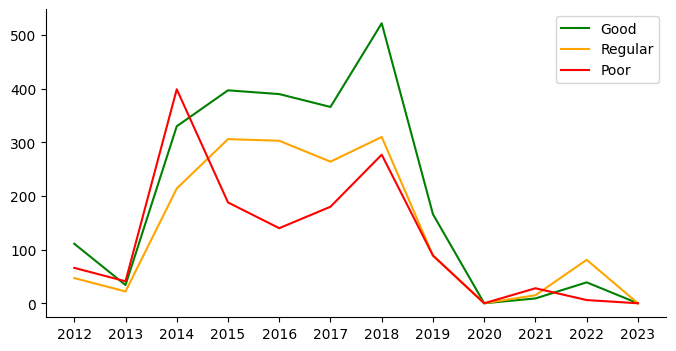

In [60]:
# Crear un rango de años de 2012 a 2023
rango_anos = pd.Index(range(2012, 2024))

# Asegurarse de que todos los años estén presentes, incluso si faltan datos
conteo_por_año = conteo_por_año.reindex(rango_anos, fill_value=0)

# Trazar las tres líneas en la misma figura
plt.figure(figsize=(8, 4))

# Colores: Verde para 'Buena', Naranja para 'Regular', Rojo para 'Mala'
conteo_por_año['Good'].plot(kind='line', color='green', label='Good')
conteo_por_año['Regular'].plot(kind='line', color='orange', label='Regular')
conteo_por_año['Poor'].plot(kind='line', color='red', label='Poor')

# Configurar el título y etiquetas de los ejes
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Asegurarse de que los años del 2012 al 2023 aparezcan en el eje x
plt.xticks(rotation=0, fontsize=10, ticks=range(2012, 2024), labels=range(2012, 2024))

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [61]:
conteo_por_año = conteo_por_año.T

In [62]:
# Obtener el número de valores de la clase Good para el año seleccionado
año = 2015
registros_good = conteo_por_año.loc['Good', año]
print(f"Número de valores de la clase Good en el año {año}:", registros_good)

Número de valores de la clase Good en el año 2015: 397


In [63]:
# Obtener el número de valores de la clase Regular para el año seleccionado
año = 2015
registros_regular = conteo_por_año.loc['Regular', año]
print(f"Número de valores de la clase Regular en el año {año}:", registros_regular)

Número de valores de la clase Regular en el año 2015: 306


In [64]:
# Obtener el número de valores de la clase Good para el año seleccionado
año = 2015
registros_poor = conteo_por_año.loc['Poor', año]
print(f"Número de valores de la clase Poor en el año {año}:", registros_poor)

Número de valores de la clase Poor en el año 2015: 188


##Statistical Analysis of Lentic Body

###Union de dataframes

In [65]:
# Unir los DataFrames a través de la columna "CLAVE SITIO"
lentico_contaminants_combined = pd.merge(
    lentico_preprocesado,  # DataFrame principal
    lentico_sites[['CLAVE SITIO', 'ORGANISMO CUENCA']],  # Seleccionar solo las columnas necesarias del otro DataFrame
    on='CLAVE SITIO',  # Columna común para realizar la unión
    how='left'  # Tipo de unión: 'left' conserva todos los registros del DataFrame principal
)

# Mostrar el DataFrame resultante
#print(lentico_contaminants_combined)


In [66]:
lentico_contaminants_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   f

In [67]:
# Filtrar valores entre 2012 y 2022 (inclusive)
lentico_contaminants_combined_2022 = lentico_contaminants_combined[(lentico_contaminants_combined['AÑO'] >= 2012) & (lentico_contaminants_combined['AÑO'] <= 2022)]

In [68]:
lentico_contaminants_combined_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   f

###No cumplimiento

####Porcentaje de no cumplimiento por contaminante y cuenca

In [69]:
df2 = lentico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda
limits2 = {
    'SST': lambda x: x > 150,
    'CF': lambda x: x > 1000,
    'E_COLI': lambda x: x > 850,
    'ODs%': lambda x: x <= 30 or x > 130,
    'ODm%': lambda x: x <= 30 or x > 130,
    'ODf%': lambda x: x <= 30 or x > 130,
    'DBO5': lambda x: x > 30,
    'DQO': lambda x: x > 40,
    'TOX_D48s': lambda x: x >= 5,
    'TOX_D48f': lambda x: x >= 5,
    'TOX_F15s': lambda x: x >= 5,
    'TOX_F15f': lambda x: x >= 5
}

# Crear una columna de no cumplimiento para cada parámetro
for col, condition in limits2.items():
    df2[f'{col}_no_cumple'] = df2[col].apply(condition)

# Calcular el porcentaje de no cumplimiento por parámetro para cada cuenca
non_compliance_summary = pd.DataFrame()
for col in limits2.keys():
    non_compliance_summary[col] = df2.groupby('ORGANISMO CUENCA')[f'{col}_no_cumple'].mean() * 100

# Mostrar el DataFrame con los resultados de no cumplimiento
non_compliance_summary.to_excel('porcentaje_lentico_no_cumplimiento_limites.xlsx')


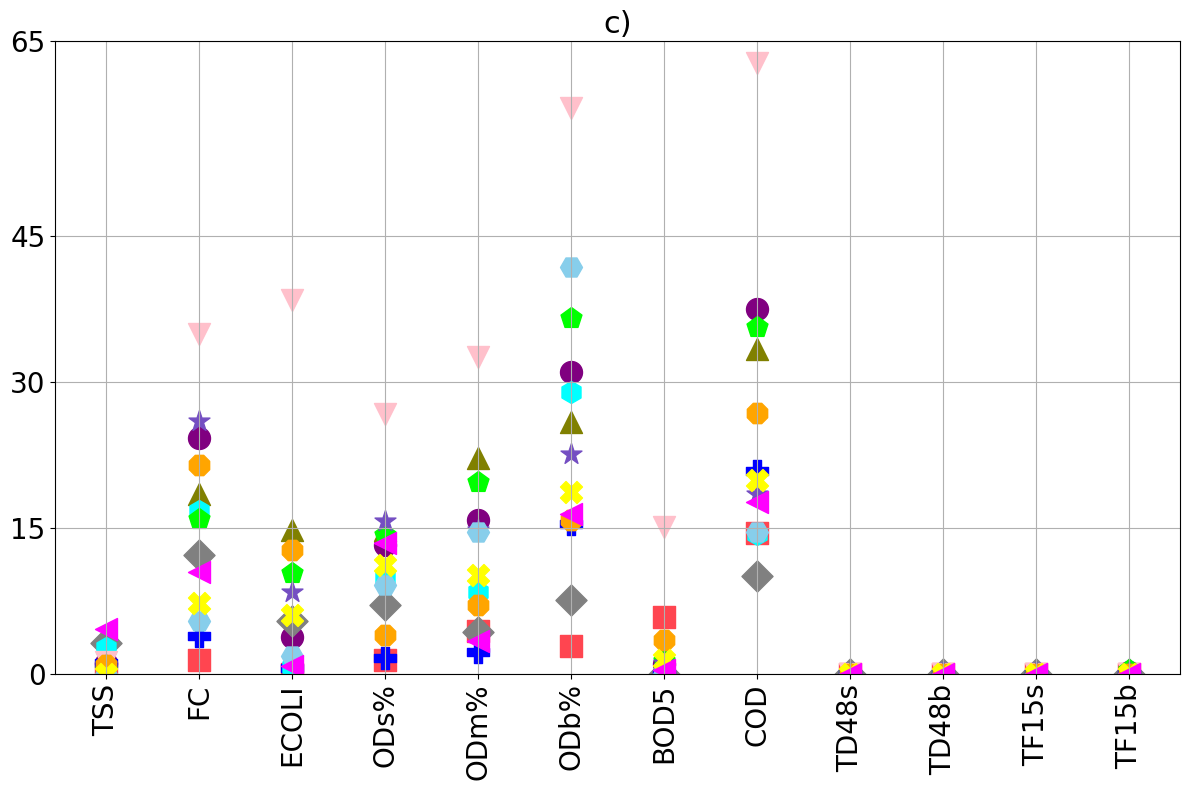

In [70]:
df2 = lentico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda
limits2 = {
    'SST': lambda x: x <= 150,
    'CF': lambda x: x <= 1000,
    'E_COLI': lambda x: x <= 850,
    'ODs%': lambda x: 30 < x <= 130,
    'ODm%': lambda x: 30 < x <= 130,
    'ODf%': lambda x: 30 < x <= 130,
    'DBO5': lambda x: x <= 30,
    'DQO': lambda x: x <= 40,
    'TOX_D48s': lambda x: x < 5,
    'TOX_D48f': lambda x: x < 5,
    'TOX_F15s': lambda x: x < 5,
    'TOX_F15f': lambda x: x < 5
}

# Crear columnas de cumplimiento para cada parámetro
for col, condition in limits2.items():
    df2[f'{col}_compliance'] = df2[col].apply(condition)

# Calcular el porcentaje de cumplimiento por parámetro para cada cuenca
compliance_summary2 = pd.DataFrame()
for col in limits2.keys():
    compliance_summary2[col] = df2.groupby('ORGANISMO CUENCA')[f'{col}_compliance'].mean() * 100

# Diccionario para renombrar las columnas en el gráfico
column_names_mapping2 = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'ODs%': 'ODs%',
    'ODm%': 'ODm%',
    'ODf%': 'ODb%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48s': 'TD48s',
    'TOX_D48f': 'TD48b',
    'TOX_F15s': 'TF15s',
    'TOX_F15f': 'TF15b'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Colores y marcadores para cada cuenca
cuencas2 = {
    'LERMA SANTIAGO PACÍFICO': ('#800080', 'o'),
    'PENÍNSULA DE BAJA CALIFORNIA': ('#FF4550', 's'),
    'PENÍNSULA DE YUCATÁN': ('#808000', '^'),
    'RÍO BRAVO': ('#808080', 'D'),
    'CUENCAS CENTRALES DEL NORTE': ('#0000FF', 'P'),
    'PACÍFICO NORTE': ('#00FFFF', 'h'),
    'AGUAS DEL VALLE DE MÉXICO': ('#FFC0CB', 'v'),
    'BALSAS': ('#00FF00', 'p'),
    'GOLFO NORTE': ('#744EC2', '*'),
    'PACÍFICO SUR': ('#87CEEB', 'H'),
    'GOLFO CENTRO': ('#FFA500', '8'),
    'FRONTERA SUR': ('#FFFF00', 'X'),
    'NOROESTE': ('#FF00FF', '<'),
}

# Graficar puntos para cada cuenca y parámetro
for cuenca in cuencas2:
    for j, col in enumerate(limits2.keys()):
        color, marker = cuencas2.get(cuenca, ('gray', 'o'))
        ax.scatter(
            [column_names_mapping2[col]],  # Usar los nombres mapeados
            [100 - compliance_summary2.loc[cuenca, col]],
            marker=marker,
            color=color,
            label=f'{cuenca}' if j == 0 else "",
            s=250
        )

# Configuración del eje Y
ax.set_ylim(0, 45)
ax.set_yticks([0, 15, 30, 45, 65])
ax.set_ylabel('', fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Configuración del eje X
ax.set_xlabel('', fontsize=14, fontweight='bold')
ax.set_xticks(list(column_names_mapping2.values()))  # Mostrar los nombres mapeados
ax.set_xticklabels(list(column_names_mapping2.values()), fontsize=20, rotation=90)
ax.tick_params(axis='x', labelsize=20)  # Tamaño de fuente del eje X

# Título del gráfico
ax.set_title('c)', fontsize=22)

# Ajustar la leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# (Descomentar si deseas incluir una leyenda)
# ax.legend(
#     by_label.values(),
#     by_label.keys(),
#     title='Cuencas',
#     title_fontsize=14,
#     fontsize=12,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.1),
#     ncol=5
# )

# Agregar cuadrícula y mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

####Número total de registros de no cumplimiento por contaminante y cuenca

In [71]:
df1 = lentico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda para identificar los valores que no cumplen
limits1 = {
    'SST': lambda x: x > 150,
    'CF': lambda x: x > 1000,
    'E_COLI': lambda x: x > 850,
    'ODs%': lambda x: x <= 30 or x > 130,
    'ODm%': lambda x: x <= 30 or x > 130,
    'ODf%': lambda x: x <= 30 or x > 130,
    'DBO5': lambda x: x > 30,
    'DQO': lambda x: x > 40,
    'TOX_D48s': lambda x: x >= 5,
    'TOX_D48f': lambda x: x >= 5,
    'TOX_F15s': lambda x: x >= 5,
    'TOX_F15f': lambda x: x >= 5
}

# Crear una columna de no cumplimiento para cada parámetro
for col, condition in limits1.items():
    df1[f'{col}_no_cumple'] = df1[col].apply(condition)

# Calcular el número total de no cumplimiento por parámetro para cada cuenca
non_compliance_summary1 = pd.DataFrame()
for col in limits1.keys():
    non_compliance_summary1[col] = df1.groupby('ORGANISMO CUENCA')[f'{col}_no_cumple'].sum()

# Mostrar el DataFrame con los resultados de no cumplimiento
#print(non_compliance_summary1)
non_compliance_summary1.to_excel('total_lentico_no_cumplimiento_limites.xlsx')

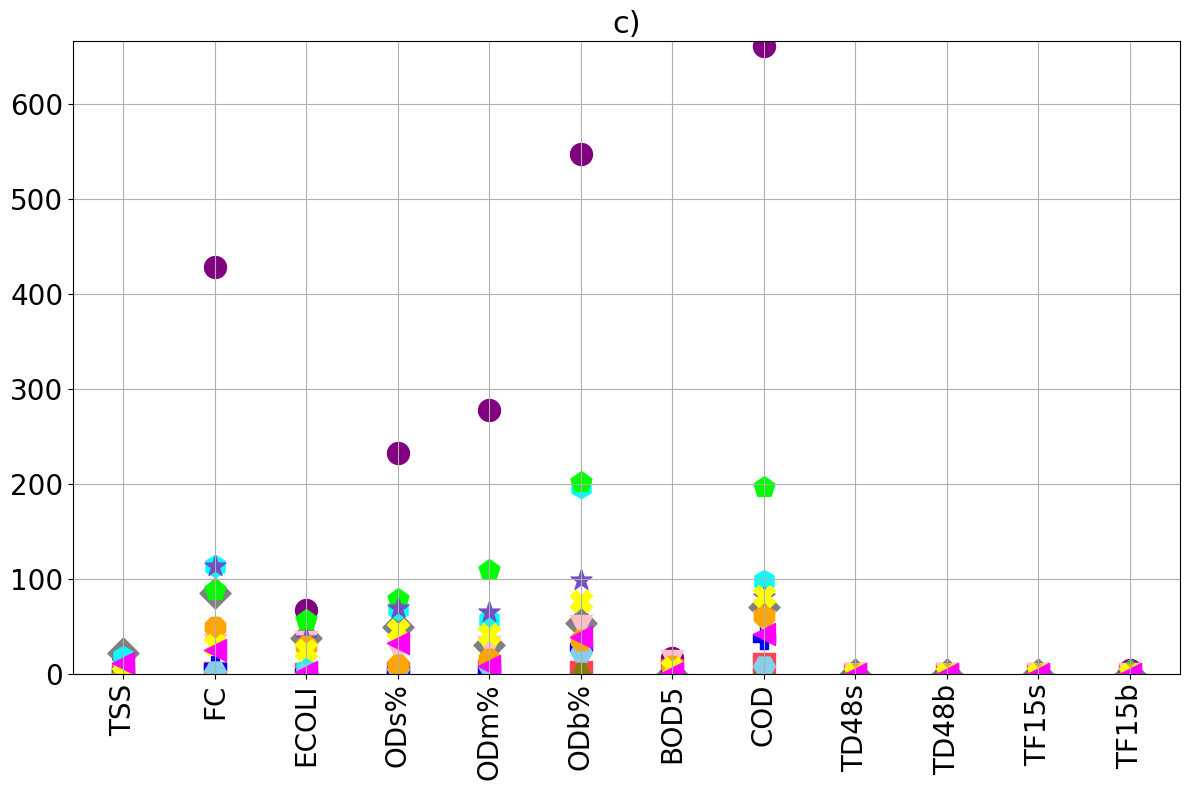

In [72]:
df1 = lentico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda
limits1 = {
    'SST': lambda x: x <= 150,
    'CF': lambda x: x <= 1000,
    'E_COLI': lambda x: x <= 850,
    'ODs%': lambda x: 30 < x <= 130,
    'ODm%': lambda x: 30 < x <= 130,
    'ODf%': lambda x: 30 < x <= 130,
    'DBO5': lambda x: x <= 30,
    'DQO': lambda x: x <= 40,
    'TOX_D48s': lambda x: x < 5,
    'TOX_D48f': lambda x: x < 5,
    'TOX_F15s': lambda x: x < 5,
    'TOX_F15f': lambda x: x < 5
}

# Crear una columna de cumplimiento para cada parámetro
for col, condition in limits1.items():
    df1[f'{col}_compliance'] = df1[col].apply(condition)

# Calcular el número total de no cumplimiento por parámetro para cada cuenca
non_compliance_summary1 = pd.DataFrame()
for col in limits1.keys():
    non_compliance_summary1[col] = df1.groupby('ORGANISMO CUENCA')[f'{col}_compliance'].apply(lambda x: x.size - x.sum())

# Diccionario para renombrar las columnas en el gráfico
column_names_mapping = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'ODs%': 'ODs%',
    'ODm%': 'ODm%',
    'ODf%': 'ODb%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48s': 'TD48s',
    'TOX_D48f': 'TD48b',
    'TOX_F15s': 'TF15s',
    'TOX_F15f': 'TF15b'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Colores y marcadores para cada cuenca
cuencas1 = {
    'LERMA SANTIAGO PACÍFICO': ('#800080', 'o'),
    'PENÍNSULA DE BAJA CALIFORNIA': ('#FF4550', 's'),
    'PENÍNSULA DE YUCATÁN': ('#808000', '^'),
    'RÍO BRAVO': ('#808080', 'D'),
    'CUENCAS CENTRALES DEL NORTE': ('#0000FF', 'P'),
    'PACÍFICO NORTE': ('#00FFFF', 'h'),
    'AGUAS DEL VALLE DE MÉXICO': ('#FFC0CB', 'v'),
    'BALSAS': ('#00FF00', 'p'),
    'GOLFO NORTE': ('#744EC2', '*'),
    'PACÍFICO SUR': ('#87CEEB', 'H'),
    'GOLFO CENTRO': ('#FFA500', '8'),
    'FRONTERA SUR': ('#FFFF00', 'X'),
    'NOROESTE': ('#FF00FF', '<'),
}

# Graficar puntos para cada cuenca y parámetro
for cuenca in cuencas1:
    for j, col in enumerate(limits1.keys()):
        color, marker = cuencas1.get(cuenca, ('gray', 'o'))
        ax.scatter(
            [column_names_mapping[col]],  # Usar los nombres mapeados
            [non_compliance_summary1.loc[cuenca, col]],
            marker=marker,
            color=color,
            label=f'{cuenca}' if j == 0 else "",
            s=250
        )

# Configuración del eje Y
ax.set_ylim(0, non_compliance_summary1.values.max() + 5)
ax.set_ylabel('', fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Configuración del eje X
ax.set_xlabel('', fontsize=14, fontweight='bold')
ax.set_xticks(list(column_names_mapping.values()))  # Mostrar los nombres mapeados
ax.set_xticklabels(list(column_names_mapping.values()), fontsize=20, rotation=90)
ax.tick_params(axis='x', labelsize=20)  # Tamaño de fuente del eje X

# Título del gráfico
ax.set_title('c)', fontsize=22)

# Ajustar la leyenda para evitar duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# (Descomentar si deseas incluir una leyenda)
# ax.legend(
#     by_label.values(),
#     by_label.keys(),
#     title='Cuencas',
#     title_fontsize=14,
#     fontsize=12,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.1),
#     ncol=5
# )

# Agregar cuadrícula y mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          5429 non-null   object 
 1   CLAVE MONITOREO      5429 non-null   object 
 2   NOMBRE DEL SITIO     5429 non-null   object 
 3   TIPO CUERPO DE AGUA  5429 non-null   object 
 4   FECHA REALIZACIÓN    5429 non-null   object 
 5   AÑO                  5429 non-null   object 
 6   SST                  5429 non-null   float64
 7   CF                   5429 non-null   float64
 8   E_COLI               5429 non-null   float64
 9   ODs%                 5429 non-null   float64
 10  ODm%                 5429 non-null   float64
 11  ODf%                 5429 non-null   float64
 12  DBO5                 5429 non-null   float64
 13  DQO                  5429 non-null   float64
 14  TOX_D48s             5429 non-null   float64
 15  TOX_D48f             5429 non-null   f

##Data visualization

In [74]:
df_2012_al_2021_sp = df_2012_al_2021_sp.iloc[:, 6:20]
df_2012_al_2022_sp = df_2012_al_2022_sp.iloc[:, 6:20]
df_2012_al_2023_sp = df_2012_al_2023_sp.iloc[:, 6:20]

In [75]:
df_2012_al_2021_p = df_2012_al_2021_p.iloc[:, 6:20]
df_2012_al_2022_p = df_2012_al_2022_p.iloc[:, 6:20]
df_2012_al_2023_p = df_2012_al_2023_p.iloc[:, 6:20]

In [76]:
# Diccionario para renombrar las columnas
nombres_columnas = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'ODs%': 'ODs%',
    'ODm%': 'ODm%',
    'ODf%': 'ODb%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48s': 'TD48s',
    'TOX_D48f': 'TD48b',
    'TOX_F15s': 'TF15s',
    'TOX_F15f': 'TF15b'
}

# Renombrar las columnas
df_2012_al_2021_sp = df_2012_al_2021_sp.rename(columns=nombres_columnas)

# Renombrar las columnas
df_2012_al_2021_p = df_2012_al_2021_p.rename(columns=nombres_columnas)

###Mapa de calor de simbolos > y <

####al 2021

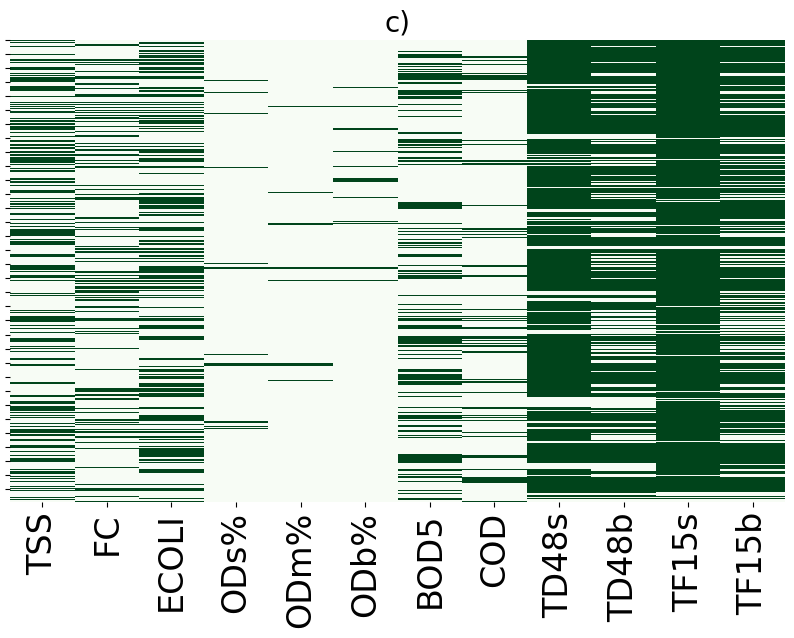

In [77]:
# Crear una matriz booleana donde True indica presencia de < o >
bool_matrix = df_2012_al_2021_sp.applymap(lambda x: '<' in str(x) or '>' in str(x))

# Crear un heatmap de la matriz booleana para todas las columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar el heatmap basado en la matriz booleana
heatmap = sns.heatmap(bool_matrix, cbar=False, cmap='Greens')  # Usar 'Greens'

# Rotar las etiquetas del eje X 90 grados y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje Y a una lista vacía para eliminarlas
heatmap.set_yticklabels([])

# Configurar el título y la etiqueta del eje X
plt.title('c)', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)

# Mostrar el heatmap
plt.show()


####al 2022

####al 2023

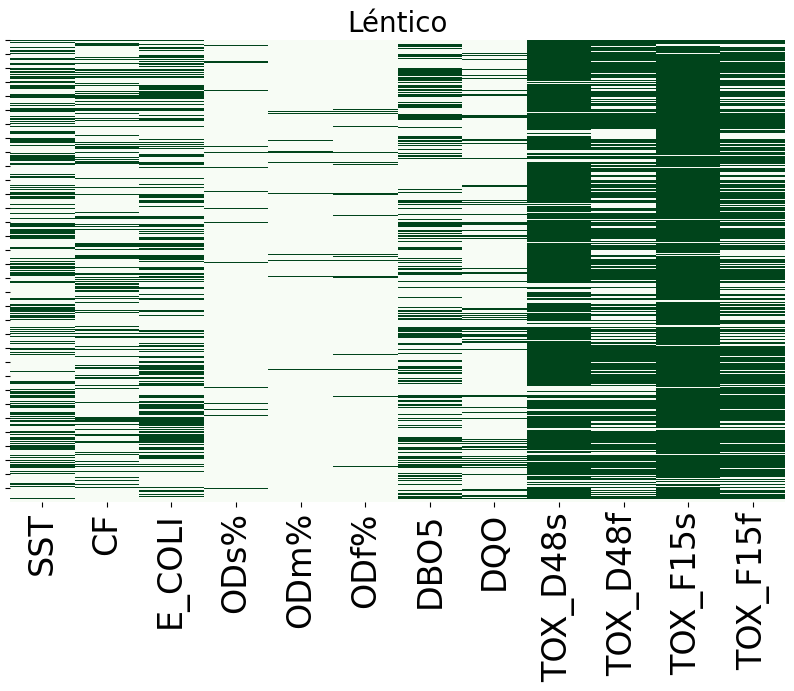

In [78]:
# Crear una matriz booleana donde True indica presencia de < o >
bool_matrix = df_2012_al_2023_sp.applymap(lambda x: '<' in str(x) or '>' in str(x))

# Crear un heatmap de la matriz booleana para todas las columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar el heatmap basado en la matriz booleana
heatmap = sns.heatmap(bool_matrix, cbar=False, cmap='Greens')  # Usar 'Greens'

# Rotar las etiquetas del eje X 90 grados y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje Y a una lista vacía para eliminarlas
heatmap.set_yticklabels([])

# Configurar el título y la etiqueta del eje X
plt.title('Léntico', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)

# Mostrar el heatmap
plt.show()


###Mapa de calor de valores nulos

####al 2021

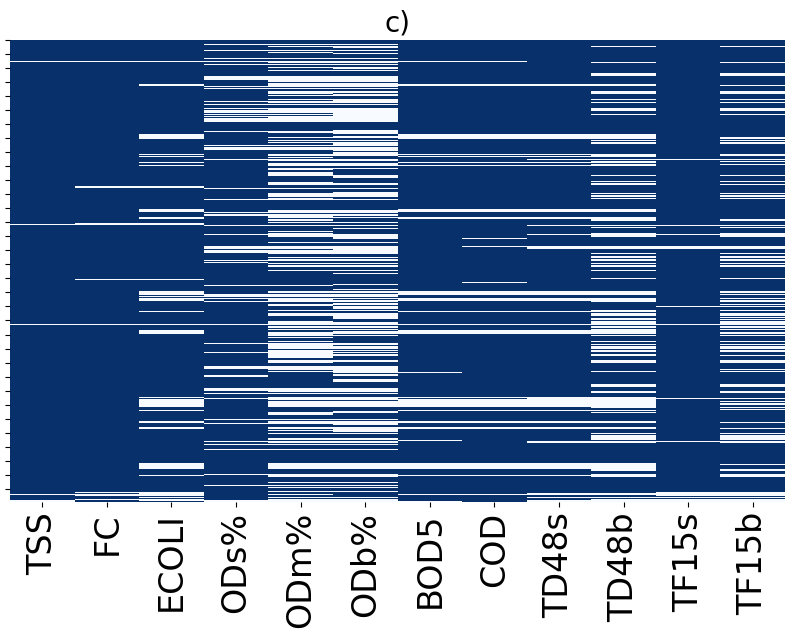

In [79]:
# Seleccionar las columnas que deseas incluir en el mapa de calor
columnas_seleccionadas_lentico = df_2012_al_2021_sp.columns  # Reemplaza con el rango de nombres de columnas que deseas

# Crear un mapa de calor de valores faltantes para todas las columnas del DataFrame
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar un mapa de calor mostrando la presencia de valores faltantes
heatmap = sns.heatmap(df_2012_al_2021_sp.isnull(), cbar=False, cmap='Blues_r')

# Rotar las etiquetas del eje x 90 grados para que sean verticales y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje y como una lista vacía para eliminarlas
heatmap.set_yticklabels([])

plt.title('c)', loc='center', fontsize=20)  # Título del gráfico
plt.xlabel('', loc='center', fontsize=20)  # Etiqueta del eje x
plt.show()  # Muestra el gráfico

####al 2022

####al_2023

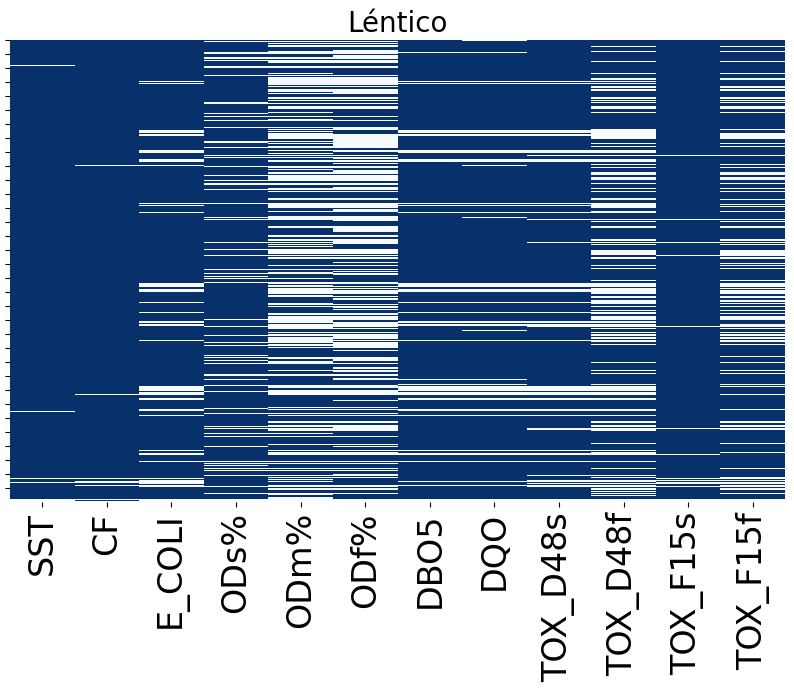

In [80]:
# Seleccionar las columnas que deseas incluir en el mapa de calor
columnas_seleccionadas_lentico = df_2012_al_2023_sp.columns  # Reemplaza con el rango de nombres de columnas que deseas

# Crear un mapa de calor de valores faltantes solo para las columnas seleccionadas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Genera un mapa de calor que muestra la presencia de valores faltantes en las columnas seleccionadas
heatmap = sns.heatmap(df_2012_al_2023_sp[columnas_seleccionadas_lentico].isnull(), cbar=False, cmap='Blues_r')

# Rotea las etiquetas del eje x 90 grados para que sean verticales y aumenta el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establece las etiquetas del eje y como una lista vacía para eliminarlas
heatmap.set_yticklabels([])

plt.title('Léntico', loc='center', fontsize=20)  # Título del gráfico
plt.xlabel('', loc='center', fontsize=20)  # Etiqueta del eje x
plt.show()  # Muestra el gráfico


###Mapa de calor de correlación de valores nulos entre contaminantes

####al 2021

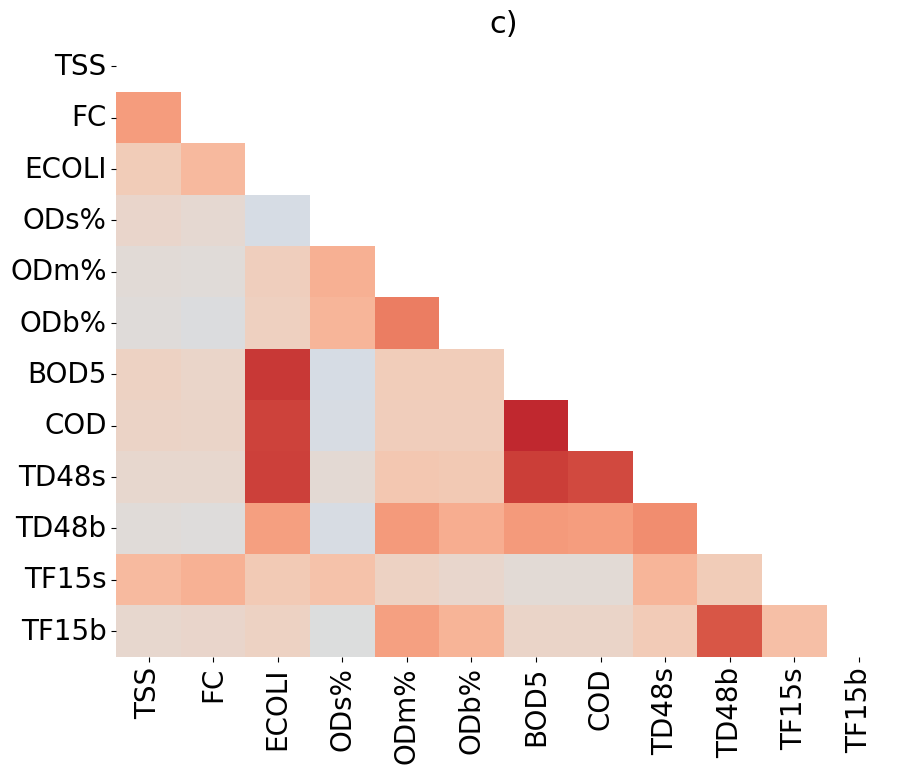

In [81]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2021_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('c)', fontsize=22)
plt.show()


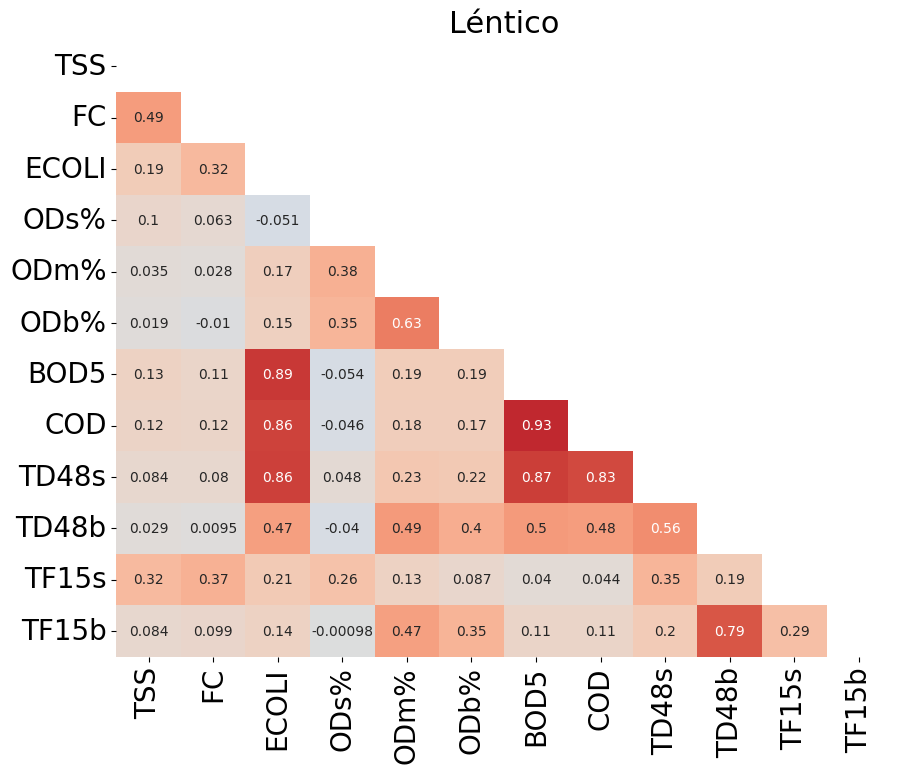

In [82]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2021_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico', fontsize=22)
plt.show()

####al 2022

####al 2023

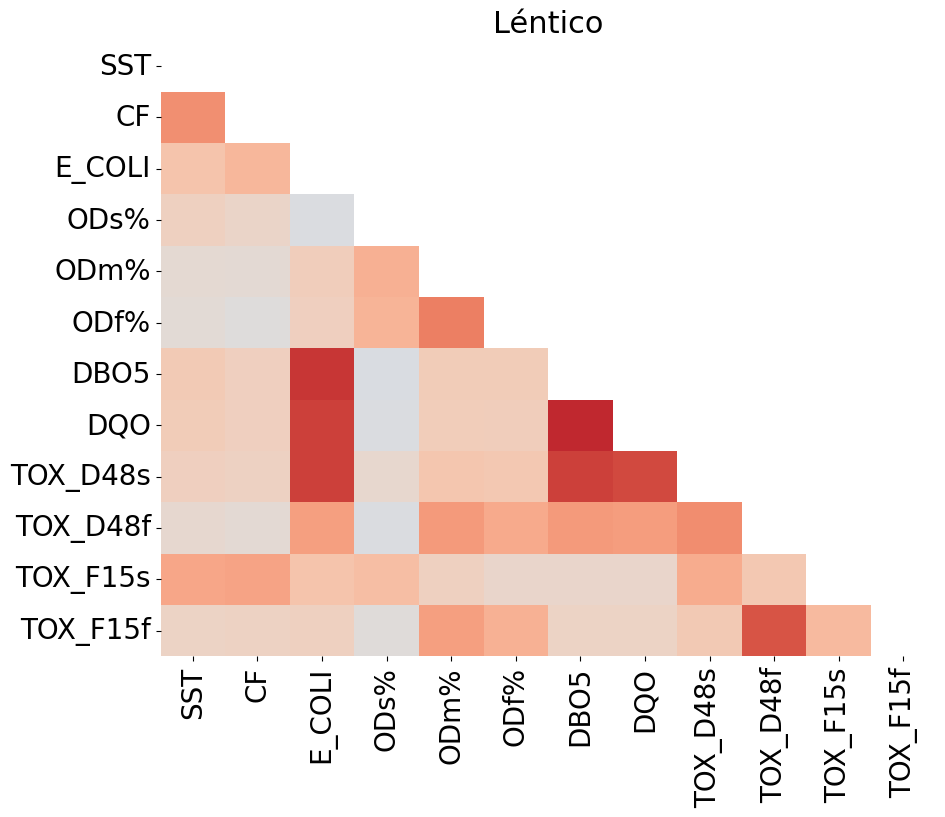

In [83]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2023_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico', fontsize=22)
plt.show()


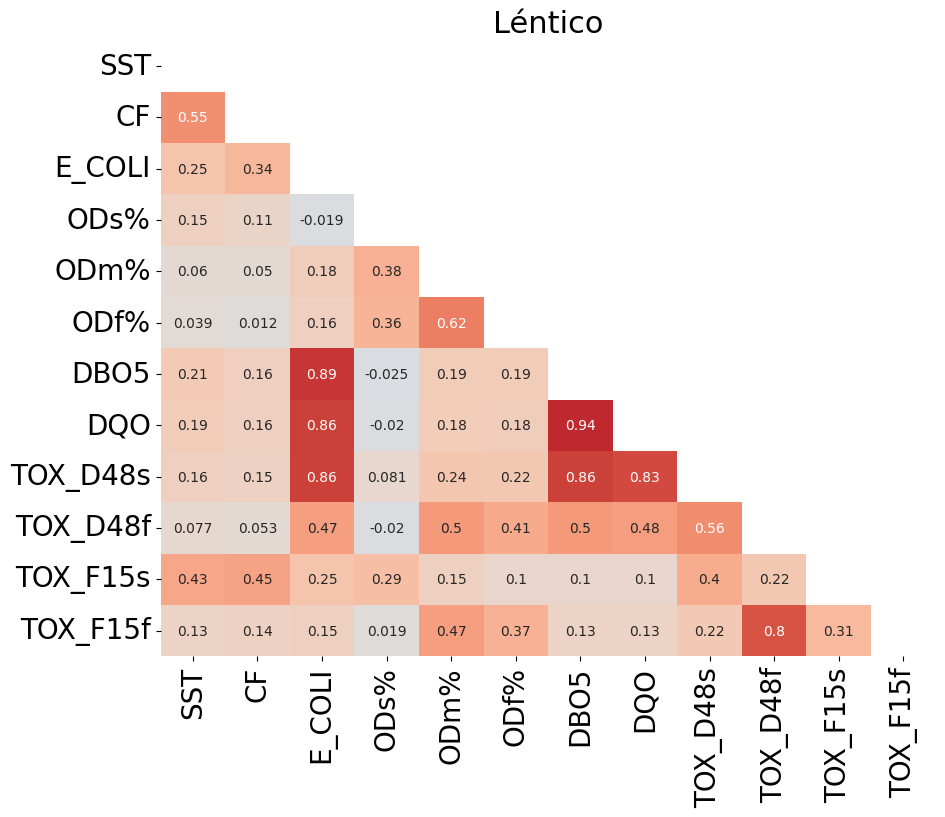

In [84]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2023_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico', fontsize=22)
plt.show()

###Mapa de calor de correlación lineal

####al 2021

#####Coeficiente de correlación de Pearson

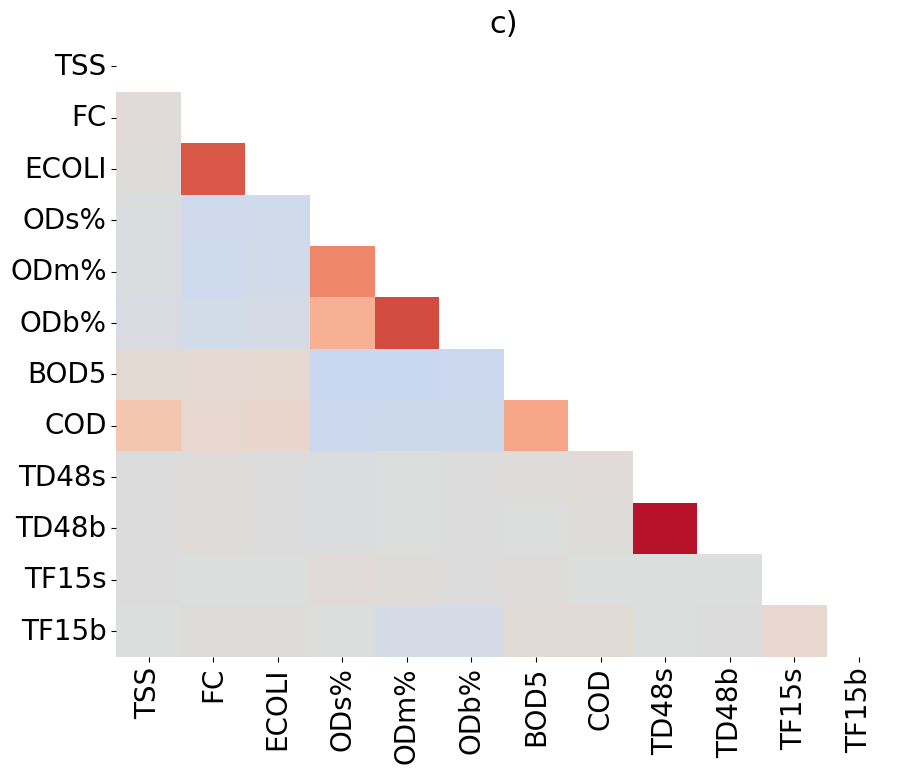

In [85]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('c)', fontsize=22)

# Mostrar el gráfico
plt.show()

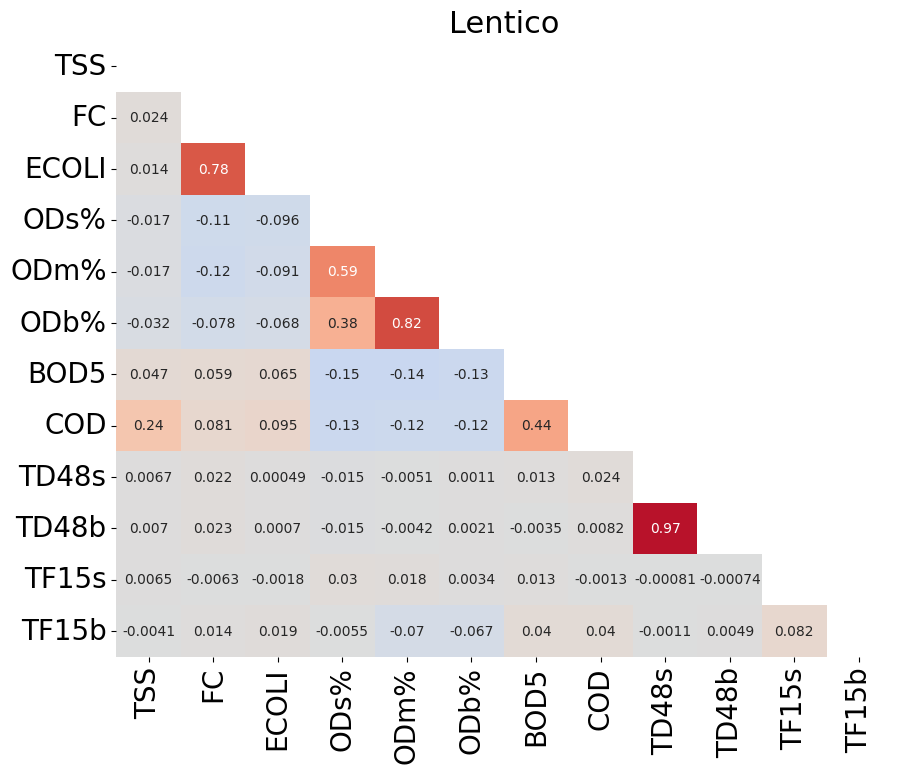

In [86]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lentico', fontsize=22)

# Mostrar el gráfico
plt.show()

#####Coeficiente de correlación de Spearman

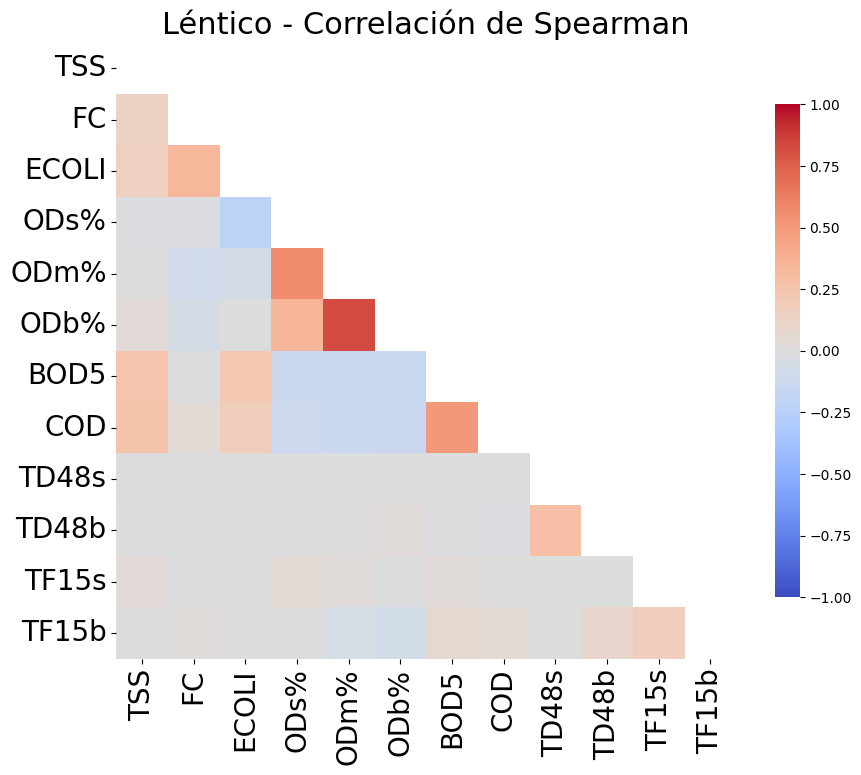

In [87]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


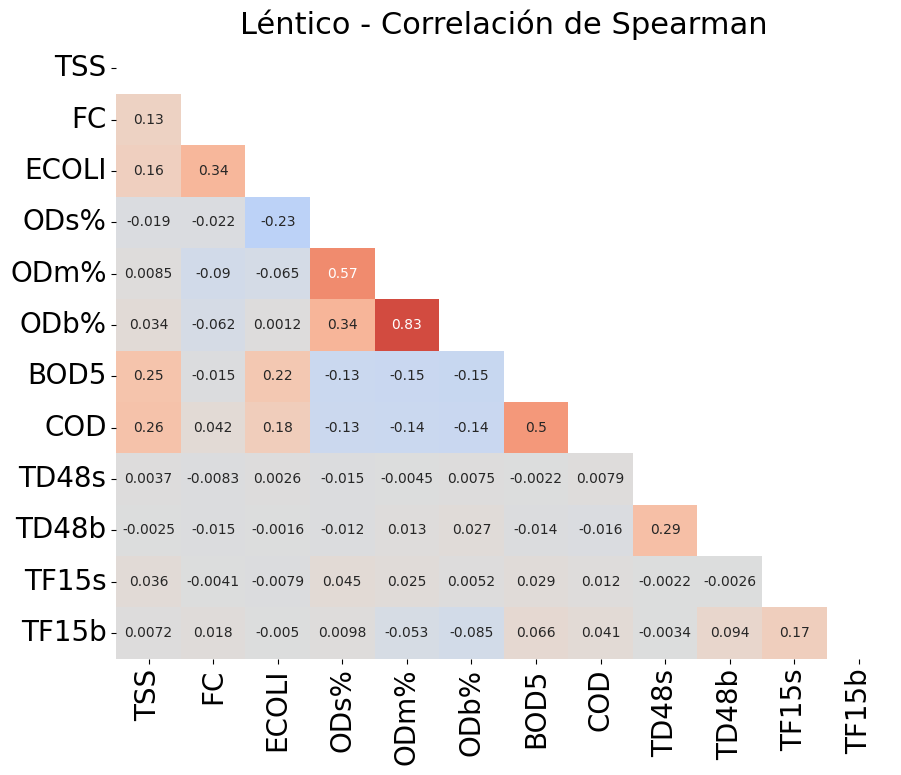

In [88]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


####al 2022

####al 2023

#####Coeficiente de correlación de Pearson

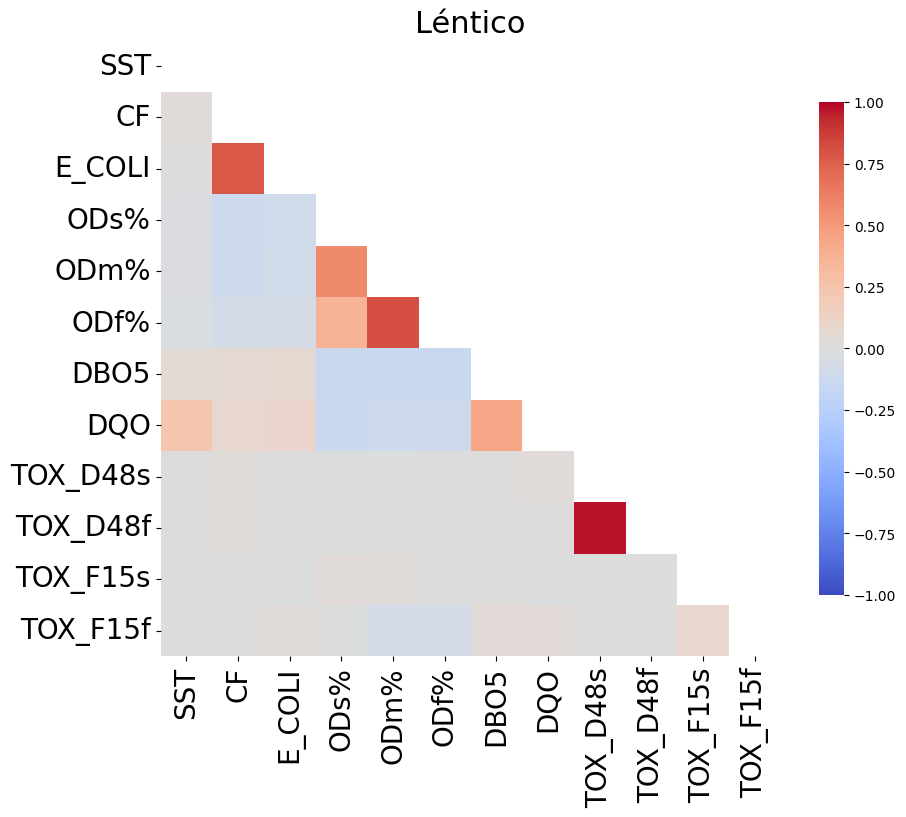

In [89]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico', fontsize=22)

# Mostrar el gráfico
plt.show()

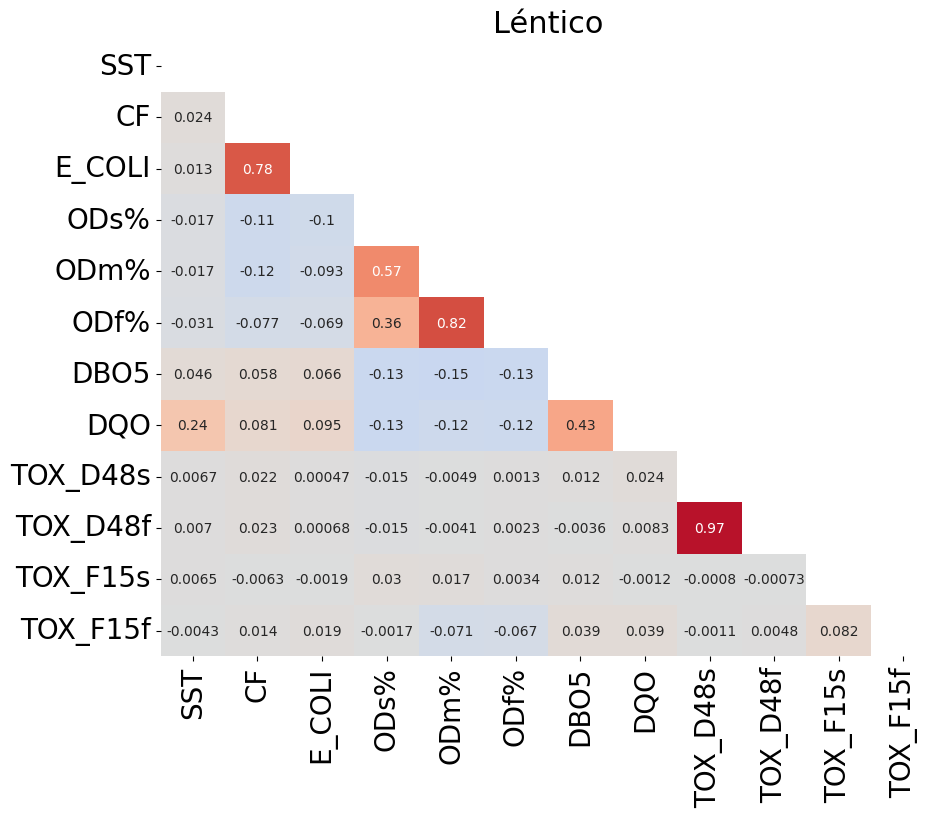

In [90]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico', fontsize=22)

# Mostrar el gráfico
plt.show()

#####Coeficiente de correlación de Spearman

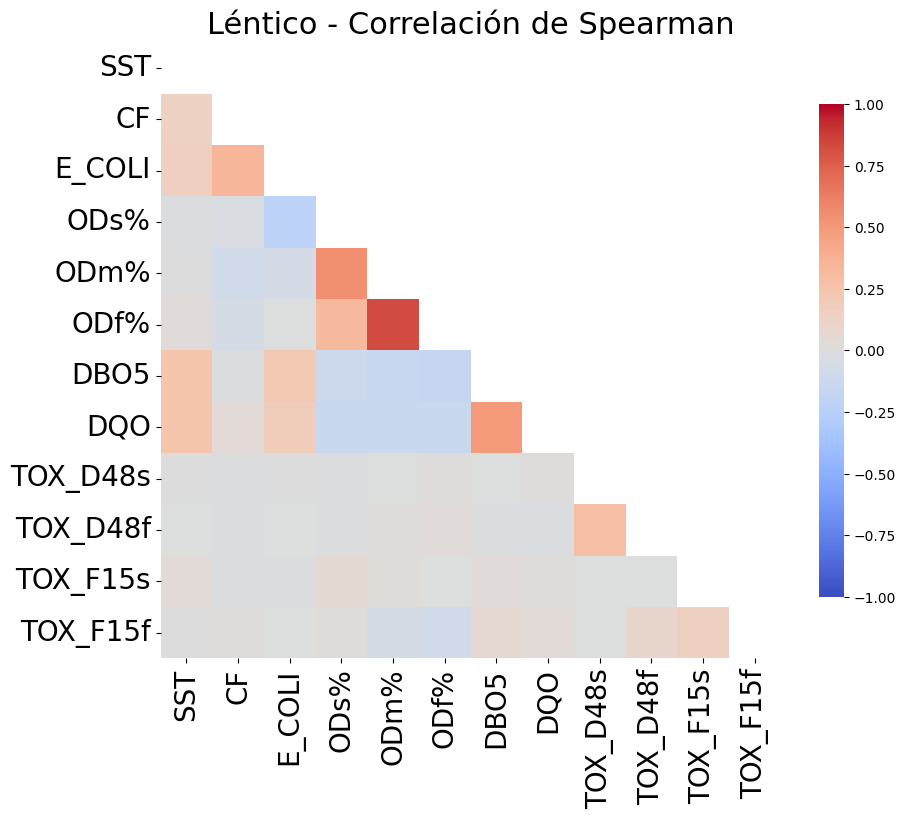

In [91]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


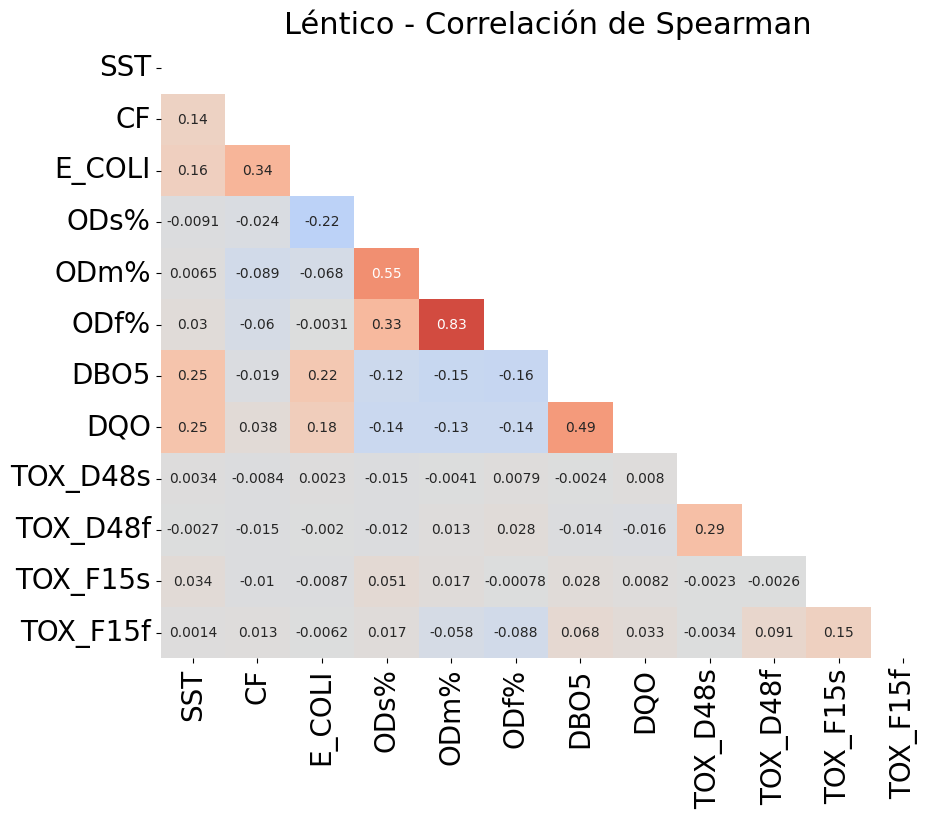

In [92]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Léntico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


###Mapa de calor de correlacion entre variables independientes y variable objetivo

####al 2021

Matriz de coeficientes Eta:
       Water quality
TSS         0.090234
FC          0.203971
ECOLI       0.098206
ODs%        0.118355
ODm%        0.310685
ODb%        0.387878
BOD5        0.393014
COD         0.664595
TD48s       0.022304
TD48b       0.020293
TF15s       0.024701
TF15b       0.061229


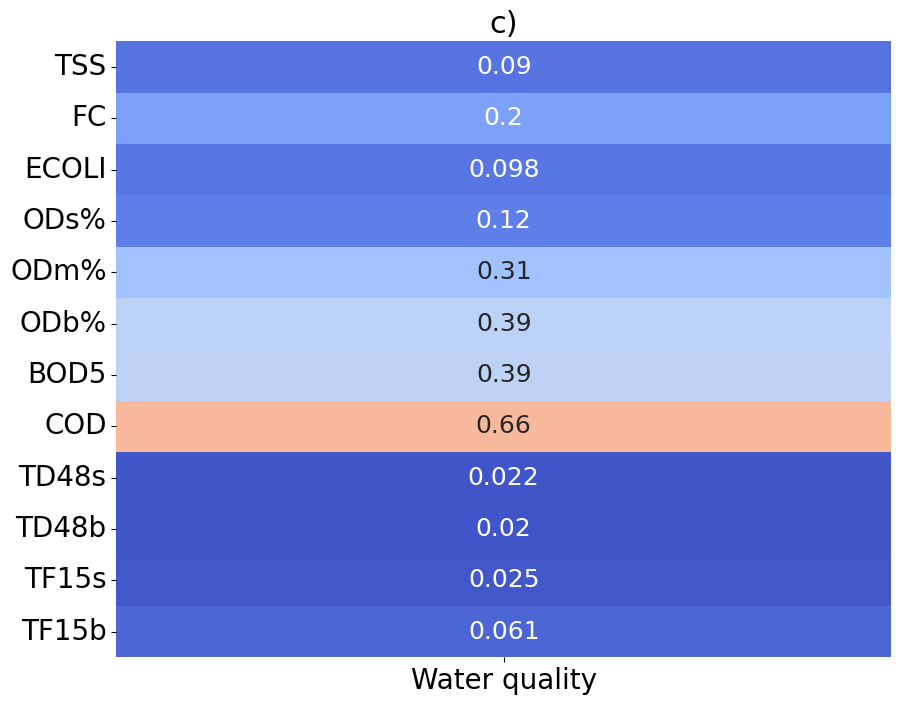

In [93]:
# Función para calcular el coeficiente Eta
def coeficiente_eta(categorica, numerica):
    categorias = categorica.unique()
    medias_grupo = numerica.groupby(categorica).mean()
    media_total = numerica.mean()

    # Suma de cuadrados entre grupos
    ss_between = sum(categorica.value_counts()[cat] * (medias_grupo[cat] - media_total)**2 for cat in categorias)
    # Suma de cuadrados totales
    ss_total = sum((numerica - media_total)**2)

    # Coeficiente Eta
    eta = np.sqrt(ss_between / ss_total)
    return eta

# Función para calcular y graficar el mapa de calor del coeficiente Eta
def graficar_coeficiente_eta(df, variable_categorica, variables_numericas, nombres_mostrados=None):
    # Si se proporcionan nombres renombrados, construir un diccionario para mapear
    if nombres_mostrados:
        nombres_dict = dict(zip(variables_numericas, nombres_mostrados))
    else:
        nombres_dict = {col: col for col in variables_numericas}  # Mismos nombres si no se proporcionan nuevos

    # Crear una matriz de coeficientes Eta
    eta_matrix = pd.DataFrame(index=nombres_mostrados if nombres_mostrados else variables_numericas,
                              columns=["Water quality"])  # Cambiar el título de la columna a "Water quality"

    for var in variables_numericas:
        eta_matrix.loc[nombres_dict[var], "Water quality"] = coeficiente_eta(df[variable_categorica], df[var])

    # Convertir a tipo float para visualización
    eta_matrix = eta_matrix.astype(float)

    # Imprimir los valores calculados
    print("Matriz de coeficientes Eta:")
    print(eta_matrix)

    # Crear un mapa de calor
    plt.figure(figsize=(10, 8))
    # Aumentar el tamaño de la letra de las anotaciones
    sns.heatmap(eta_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar=False, cbar_kws={'shrink': 0.8},
                annot_kws={'size': 18})  # Puedes cambiar el valor de 'size' para hacer el texto más grande

    # Personalización del gráfico
    plt.title('c)', fontsize=22)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.xlabel("", fontsize=20)  # Cambiar etiqueta del eje x
    plt.show()

    # Ejemplo de uso con nombres personalizados:
graficar_coeficiente_eta(
    df=df_lentico_calidad_del_agua_2021,
    variable_categorica='Calidad del agua',
    variables_numericas=['SST', 'CF', 'E_COLI', 'ODs%', 'ODm%', 'ODf%', 'DBO5', 'DQO', 'TOX_D48s', 'TOX_D48f','TOX_F15s','TOX_F15f',],
    nombres_mostrados=['TSS', 'FC', 'ECOLI', 'ODs%', 'ODm%', 'ODb%', 'BOD5', 'COD', 'TD48s', 'TD48b', 'TF15s', 'TF15b']
)

####al 2022

####al 2023

##Template

In [94]:
lentico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15427 entries, 0 to 15426
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          15427 non-null  object 
 1   CLAVE MONITOREO      15427 non-null  object 
 2   NOMBRE DEL SITIO     15427 non-null  object 
 3   TIPO CUERPO DE AGUA  15427 non-null  object 
 4   FECHA REALIZACIÓN    15427 non-null  object 
 5   AÑO                  15427 non-null  object 
 6   SST                  15175 non-null  float64
 7   CF                   15078 non-null  float64
 8   E_COLI               13362 non-null  float64
 9   ODs%                 13338 non-null  float64
 10  ODm%                 8305 non-null   float64
 11  ODf%                 7746 non-null   float64
 12  DBO5                 13532 non-null  float64
 13  DQO                  13384 non-null  float64
 14  TOX_D48s             13243 non-null  float64
 15  TOX_D48f             10152 non-null 

In [95]:
lentico_template = lentico.copy()

In [96]:
# Filtrar el DataFrame original para que solo incluya las filas donde el año es 2022
lentico_template = lentico[lentico['AÑO'].isin([2022])]

In [97]:
lentico_template = lentico_template.reset_index(drop=True)

In [98]:
# Reemplazar los caracteres específicos en las columnas seleccionadas
columns = ['SST', 'CF', 'E_COLI', 'ODs%', 'ODm%', 'ODf%','DBO5', 'DQO', 'TOX_D48s', 'TOX_D48f','TOX_F15s', 'TOX_F15f']  # Asegúrate de ajustar 'columns' según tus necesidades

# Usar .loc para evitar el SettingWithCopyWarning
lentico_template.loc[:, columns] = lentico_template[columns].replace({'<':'', '>':'', '≤':'', '≥':''}, regex=True)


In [99]:
lentico_template.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          476 non-null    object 
 1   CLAVE MONITOREO      476 non-null    object 
 2   NOMBRE DEL SITIO     476 non-null    object 
 3   TIPO CUERPO DE AGUA  476 non-null    object 
 4   FECHA REALIZACIÓN    476 non-null    object 
 5   AÑO                  476 non-null    object 
 6   SST                  396 non-null    float64
 7   CF                   399 non-null    float64
 8   E_COLI               380 non-null    float64
 9   ODs%                 385 non-null    float64
 10  ODm%                 147 non-null    float64
 11  ODf%                 252 non-null    float64
 12  DBO5                 391 non-null    float64
 13  DQO                  393 non-null    float64
 14  TOX_D48s             348 non-null    float64
 15  TOX_D48f             225 non-null    flo

In [100]:
# Eliminar filas con valores nulos en las columnas 'Alk', 'Cond' y 'Hard'
lentico_template = lentico_template.dropna(subset=['SST', 'CF', 'E_COLI', 'ODs%', 'ODm%', 'ODf%','DBO5', 'DQO', 'TOX_D48s', 'TOX_D48f','TOX_F15s', 'TOX_F15f'])

In [101]:
lentico_template.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 377
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE SITIO          126 non-null    object 
 1   CLAVE MONITOREO      126 non-null    object 
 2   NOMBRE DEL SITIO     126 non-null    object 
 3   TIPO CUERPO DE AGUA  126 non-null    object 
 4   FECHA REALIZACIÓN    126 non-null    object 
 5   AÑO                  126 non-null    object 
 6   SST                  126 non-null    float64
 7   CF                   126 non-null    float64
 8   E_COLI               126 non-null    float64
 9   ODs%                 126 non-null    float64
 10  ODm%                 126 non-null    float64
 11  ODf%                 126 non-null    float64
 12  DBO5                 126 non-null    float64
 13  DQO                  126 non-null    float64
 14  TOX_D48s             126 non-null    float64
 15  TOX_D48f             126 non-null    float64


In [102]:
lentico_template.to_csv("lentico_template.csv")

##Model training

#####Separación de los datos en conjuntos de entrenamiento y prueba

In [103]:
# Crea un nuevo DataFrame para el entrenamiento del modelo con datos desde 2012 hasta 2021, excluyendo los años 2022 y 2023
train_lentic = data_lentico[(data_lentico['AÑO'] != 2022) & (data_lentico['AÑO'] != 2023)]

# Crea un nuevo DataFrame para validación que consiste únicamente en datos de los años 2022 y 2023
val_lentic = data_lentico[(data_lentico['AÑO'] == 2022) | (data_lentico['AÑO'] == 2023)]

In [104]:
# Selecciona columnas para el entrenamiento del modelo, incluyendo las columnas de contaminantes y la variable objetivo 'Calidad del agua' para el conjunto de datos de 2012 a 2021
train_lentic_num = train_lentic.iloc[:, list(range(6, 18)) + [42]]
train_lentic_num.head()

,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f,Calidad del agua
0,10.0,3.0,3.0,10.0,10.0,10.0,2.34,19.776,1.0,1.0,1.0,1.0,1
3,10.0,1728.0,86.0,137.9,61.8,36.5,9.00,35.000,1.0,1.0,1.0,1.0,1
4,10.0,160.0,1.0,102.1,37.5,28.7,4.20,44.740,1.0,1.0,1.0,1.0,2
5,10.0,63.0,1.0,114.6,37.0,37.0,2.00,10.000,1.0,1.0,1.0,1.0,0
6,10.0,426.0,1.0,115.6,26.4,30.8,4.66,36.790,1.0,1.0,1.0,1.0,1


In [105]:
# Muestra el tamaño del DataFrame de entrenamiento
train_lentic_num.shape

(5303, 13)

In [106]:
# Selecciona columnas para el entrenamiento del modelo, incluyendo las columnas de contaminantes y la variable objetivo 'Calidad del agua' para el conjunto de datos del año 2022
val_lentic_num = val_lentic.iloc[:, list(range(6, 18)) + [42]]
val_lentic_num.head()

,SST,CF,E_COLI,ODs%,ODm%,ODf%,DBO5,DQO,TOX_D48s,TOX_D48f,TOX_F15s,TOX_F15f,Calidad del agua
14951,21.2,288.0,41.0,114.9,56.6,23.3,2.00,10.00,1.0,1.0,1.0,1.0,1
14958,19.0,2400.0,2400.0,54.0,40.0,36.0,2.13,27.96,1.0,1.0,1.0,1.0,1
14959,10.0,435.0,10.0,96.7,91.6,71.5,2.00,10.00,1.0,1.0,1.0,1.0,0
14960,25.2,384.0,10.0,103.5,94.2,80.4,2.00,10.00,1.0,1.0,1.0,1.0,0
14973,16.0,460.0,240.0,62.4,38.7,24.5,20.82,38.40,1.0,1.0,1.0,1.0,1


In [107]:
# Muestra el tamaño del DataFrame de validación
val_lentic_num.shape

(126, 13)

Separación de la variable dependiente (y) de las variables independientes (X)

In [108]:
# Separa las características (X_val_lentico) y la variable objetivo (y_val_lentico) para la validación
X_train_lentic_num = train_lentic_num.drop(columns=['Calidad del agua'])
y_train_lentic_num = train_lentic_num['Calidad del agua']

In [109]:
# Separa las características (X_val_lentico) y la variable objetivo (y_val_lentico) para la validación
X_val_lentic_num = val_lentic_num.drop(columns=['Calidad del agua'])
y_val_lentic_num = val_lentic_num['Calidad del agua']

In [110]:
X_train_lentic_num.shape, y_train_lentic_num.shape, X_val_lentic_num.shape, y_val_lentic_num.shape,

((5303, 12), (5303,), (126, 12), (126,))

In [111]:
# Guardar el conjunto de entrenamiento en un archivo Excel
#X_train_lentic.to_excel("train_data_ub_lentic.xlsx", index=False)
#y_train_lentic.to_excel("train_labels_data_ub_lentic.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
#X_ub_num_test_lentic.to_excel("test_data_ub_lentic.xlsx", index=False)
#y_ub_num_test_lentic.to_excel("test_labels_data_ub_lentic.xlsx", index=False)

In [112]:
# Calcula el conteo de clases presentes en la columna 'Water quality'
conteo_clases = train_lentic_num['Calidad del agua'].value_counts()

# Imprime el conteo de clases
print(conteo_clases)

Calidad del agua
0    2325
1    1570
2    1408
Name: count, dtype: int64


In [113]:
# Calcula el conteo de clases presentes en la columna 'Water quality' del conjunto de validación
conteo_clases = val_lentic_num['Calidad del agua'].value_counts()

# Imprime el conteo de clases
print(conteo_clases)

Calidad del agua
1    81
0    39
2     6
Name: count, dtype: int64


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lentic_num, y_train_lentic_num, test_size= 0.2, random_state=42)

In [115]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###By default

####Unbalanced classes

#####XGBOOST

In [116]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_xgb = XGBClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_xgb.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


   Feature  Importance
7      COD    0.440783
1       FC    0.213283
5     ODb%    0.181680
3     ODs%    0.085857
0      TSS    0.020397
2    ECOLI    0.016318
4     ODm%    0.012814
11   TF15b    0.011831
10   TF15s    0.011071
6     BOD5    0.005965
8    TD48s    0.000000
9    TD48b    0.000000


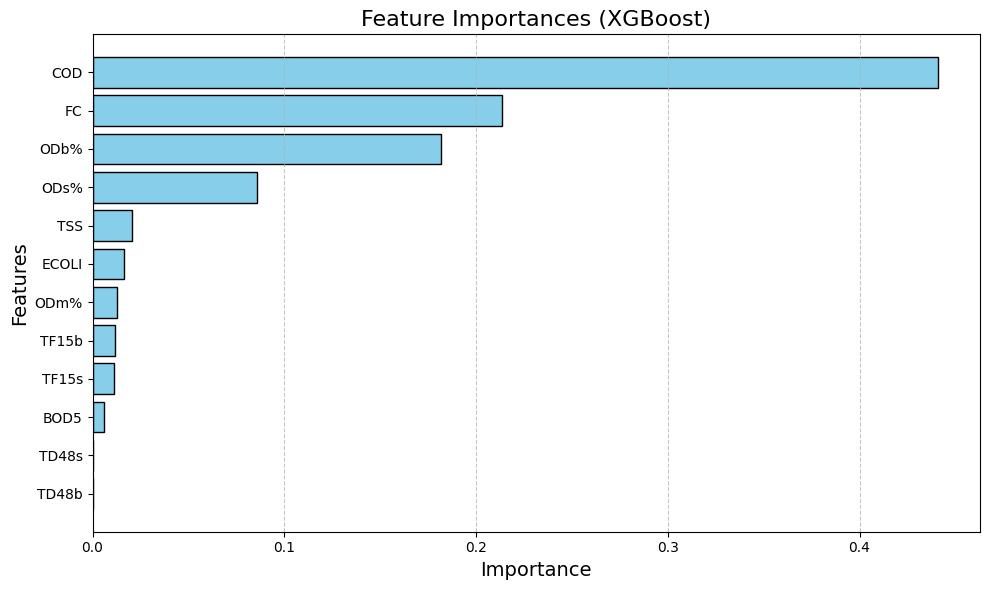

In [117]:
# Extraer las importancias de las características del modelo XGBoost ajustado
feature_importances_xgb_d = model_lentic_xgb.feature_importances_

# Definir los nombres de las características (asegúrate de que estos sean correctos)
# Si usas un conjunto de datos diferente, cambia estos nombres por los correctos
feature_names = ['TSS', 'FC', 'ECOLI', 'ODs%', 'ODm%', 'ODb%', 'BOD5', 'COD', 'TD48s', 'TD48b', 'TF15s', 'TF15b']  # Reemplaza con tus nombres reales de características

# Crear un DataFrame para organizar las importancias
importance_xgb_d = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_xgb_d
}).sort_values(by='Importance', ascending=False)

# Mostrar la tabla de importancias
print(importance_xgb_d)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_xgb_d['Feature'], importance_xgb_d['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances (XGBoost)', fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje Y para que la más importante esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


######Metrics

 Evaluate the model on the training set

In [118]:
# Make predictions on the training set
y_pred = model_lentic_xgb.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[1861    0    0]
 [   0 1269    0]
 [   0    0 1112]]


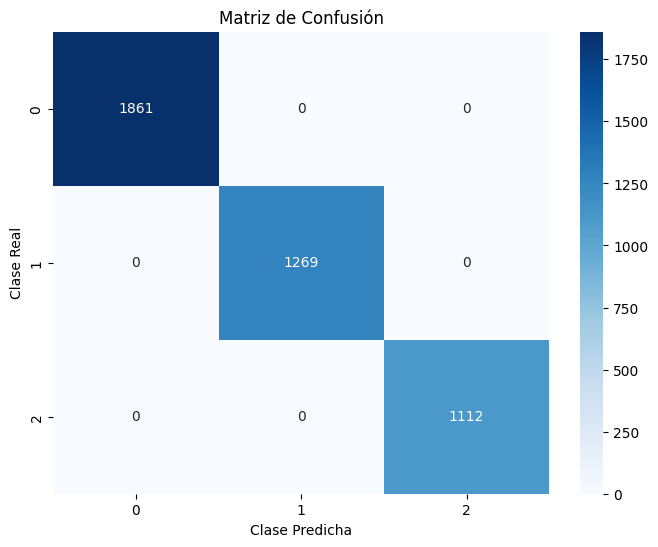

In [119]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [120]:
# Make predictions on the testing set
y_pred = model_lentic_xgb.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9952874646559849
Precision:  0.9953021949268459
Precision per class: [0.99143469 0.9966443  1.        ]
Recall:  0.9952874646559849
Recall per class: [0.99784483 0.98671096 1.        ]
F1 Score:  0.9952832563485456
F1-score for the class 0: 0.9946294307196563
F1-score for the class 1: 0.991652754590985
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[463   1   0]
 [  4 297   0]
 [  0   0 296]]


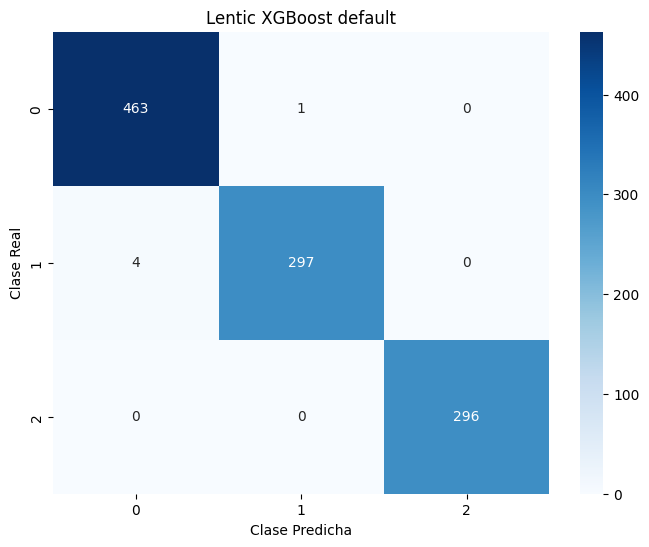

In [121]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic XGBoost default')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [122]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_xgb.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[39  0  0]
 [ 0 81  0]
 [ 0  0  6]]


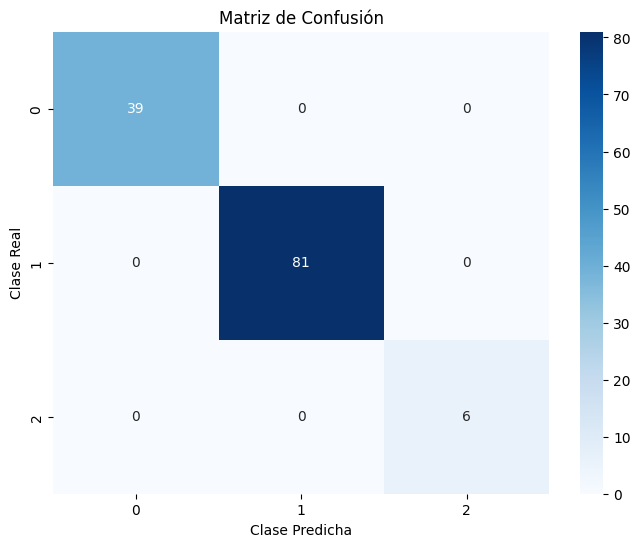

In [123]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####SVM

In [124]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_svm = SVC()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_svm.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_svm.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [125]:
# Make predictions on the training set
y_pred = model_lentic_svm.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9391796322489392
Precision:  0.9395857065218316
Precision per class: [0.92141757 0.93327773 0.97718978]
Recall:  0.9391796322489392
Recall per class: [0.96399785 0.88179669 0.9631295 ]
F1 Score:  0.9389399723850802
F1-score for the class 0: 0.9422268907563025
F1-score for the class 1: 0.906807131280389
F1-score for the class 2: 0.970108695652174
jaccard: 0.8858566547402608
Confusion Matrix: 
[[1794   60    7]
 [ 132 1119   18]
 [  21   20 1071]]


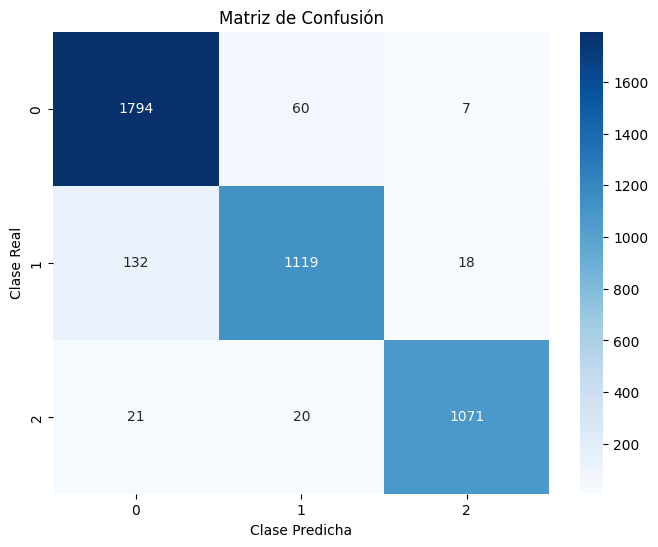

In [126]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [127]:
# Make predictions on the testing set
y_pred = model_lentic_svm.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9208294062205467
Precision:  0.9212499819399015
Precision per class: [0.90759754 0.89236111 0.97202797]
Recall:  0.9208294062205467
Recall per class: [0.95258621 0.8538206  0.93918919]
F1 Score:  0.920602410997485
F1-score for the class 0: 0.9295478443743428
F1-score for the class 1: 0.8726655348047538
F1-score for the class 2: 0.9553264604810997
jaccard: 0.8858566547402608
Confusion Matrix: 
[[442  20   2]
 [ 38 257   6]
 [  7  11 278]]


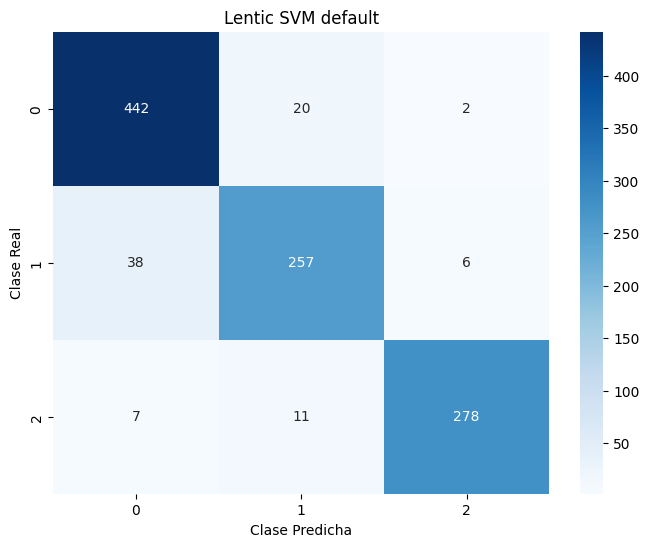

In [128]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic SVM default')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [129]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_svm.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8412698412698413
Precision:  0.8591908743572149
Precision per class: [0.78571429 0.91780822 0.54545455]
Recall:  0.8412698412698413
Recall per class: [0.84615385 0.82716049 1.        ]
F1 Score:  0.8451872331424152
F1-score for the class 0: 0.8148148148148148
F1-score for the class 1: 0.8701298701298701
F1-score for the class 2: 0.7058823529411765
jaccard: 0.7338455366472607
Confusion Matrix: 
[[33  6  0]
 [ 9 67  5]
 [ 0  0  6]]


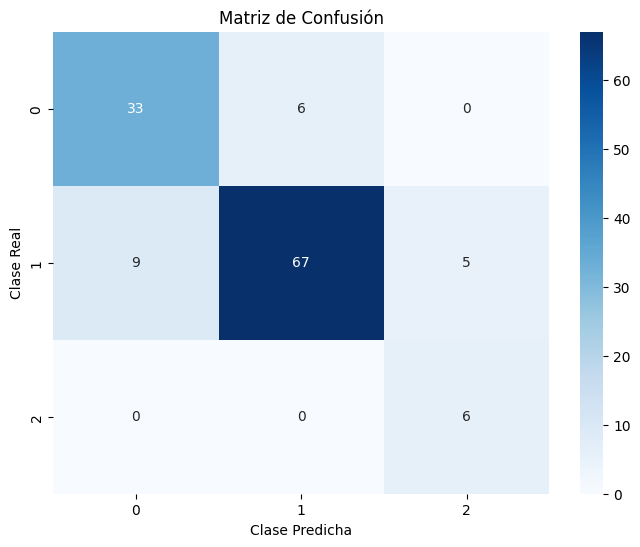

In [130]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####KNN

In [131]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_knn = KNeighborsClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_knn.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_knn.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [132]:
# Make predictions on the training set
y_pred = model_lentic_knn.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9377652050919377
Precision:  0.938744662589361
Precision per class: [0.91859296 0.94402036 0.96644921]
Recall:  0.9377652050919377
Recall per class: [0.9822676  0.87706856 0.93255396]
F1 Score:  0.9373395885417836
F1-score for the class 0: 0.9493638016099715
F1-score for the class 1: 0.9093137254901961
F1-score for the class 2: 0.9491990846681923
jaccard: 0.8826194106024174
Confusion Matrix: 
[[1828   21   12]
 [ 132 1113   24]
 [  30   45 1037]]


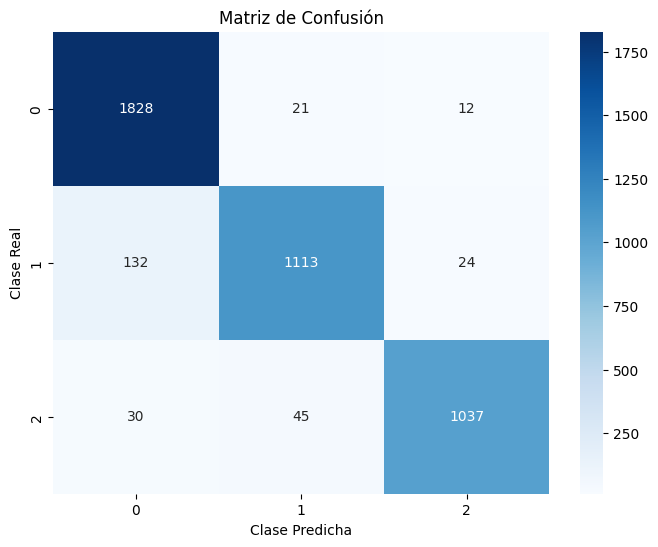

In [133]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [134]:
# Make predictions on the testing set
y_pred = model_lentic_knn.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.884071630537229
Precision:  0.8873609418100542
Precision per class: [0.85604607 0.86956522 0.95454545]
Recall:  0.884071630537229
Recall per class: [0.9612069  0.79734219 0.85135135]
F1 Score:  0.8831192049598116
F1-score for the class 0: 0.9055837563451776
F1-score for the class 1: 0.8318890814558059
F1-score for the class 2: 0.9
jaccard: 0.8826194106024174
Confusion Matrix: 
[[446  13   5]
 [ 54 240   7]
 [ 21  23 252]]


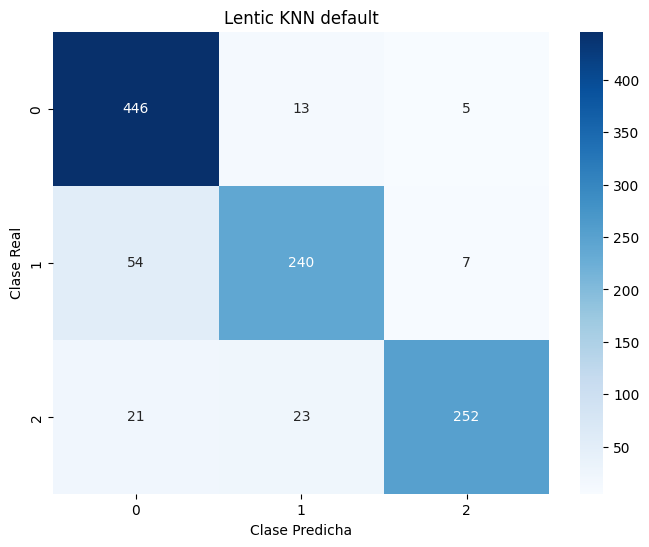

In [135]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic KNN default')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [136]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_knn.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8333333333333334
Precision:  0.8662414965986395
Precision per class: [0.8        0.93055556 0.42857143]
Recall:  0.8333333333333334
Recall per class: [0.82051282 0.82716049 1.        ]
F1 Score:  0.8423501045988014
F1-score for the class 0: 0.810126582278481
F1-score for the class 1: 0.8758169934640523
F1-score for the class 2: 0.6
jaccard: 0.7319783430442934
Confusion Matrix: 
[[32  5  2]
 [ 8 67  6]
 [ 0  0  6]]


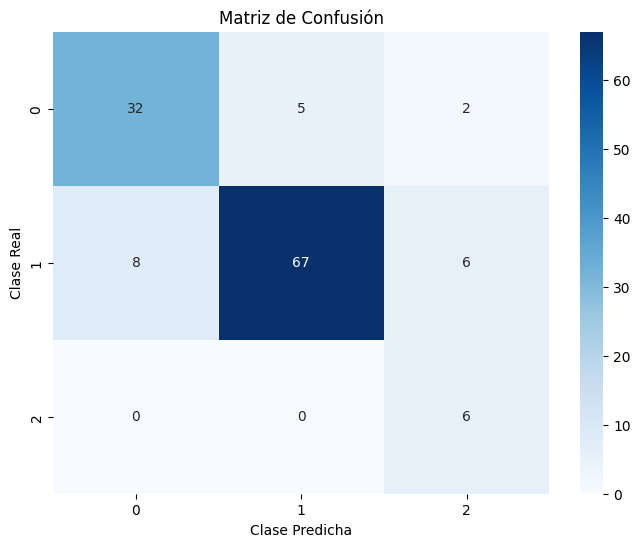

In [137]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####DT

In [138]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_dt = DecisionTreeClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_dt.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_dt.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


   Feature  Importance
7      COD    0.450500
5     ODb%    0.228997
1       FC    0.199339
3     ODs%    0.095606
4     ODm%    0.008516
0      TSS    0.008408
2    ECOLI    0.006458
6     BOD5    0.001449
10   TF15s    0.000726
8    TD48s    0.000000
9    TD48b    0.000000
11   TF15b    0.000000


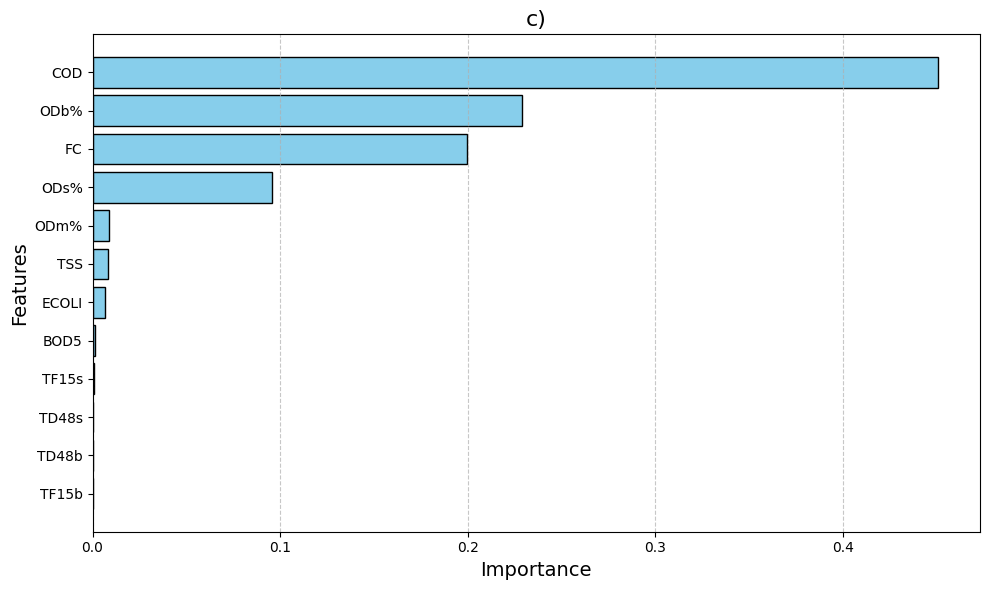

In [139]:
# Extraer las importancias de las características del modelo XGBoost ajustado
feature_importances_dt_d = model_lentic_dt.feature_importances_

# Definir los nombres de las características (asegúrate de que estos sean correctos)
# Si usas un conjunto de datos diferente, cambia estos nombres por los correctos
feature_names = ['TSS', 'FC', 'ECOLI', 'ODs%', 'ODm%', 'ODb%', 'BOD5', 'COD', 'TD48s', 'TD48b', 'TF15s', 'TF15b']  # Reemplaza con tus nombres reales de características

# Crear un DataFrame para organizar las importancias
importance_dt_d = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_dt_d
}).sort_values(by='Importance', ascending=False)

# Mostrar la tabla de importancias
print(importance_dt_d)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_dt_d['Feature'], importance_dt_d['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('c)', fontsize=16)
plt.gca().invert_yaxis()  # Invertir el eje Y para que la más importante esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


######Metrics

 Evaluate the model on the training set

In [140]:
# Make predictions on the training set
y_pred = model_lentic_dt.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[1861    0    0]
 [   0 1269    0]
 [   0    0 1112]]


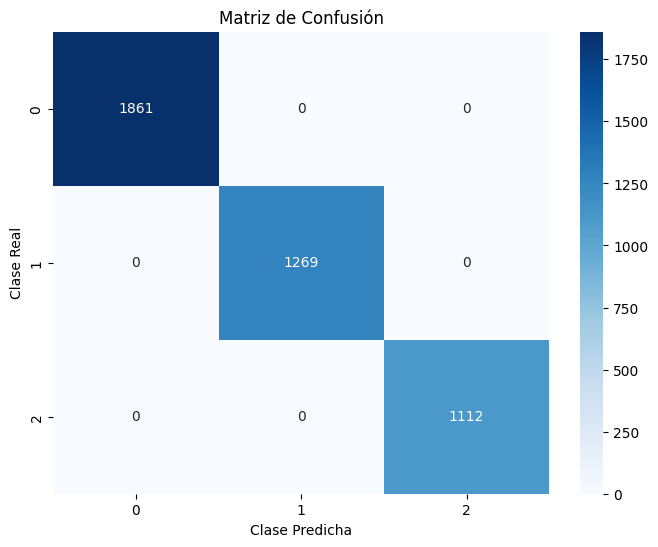

In [141]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [142]:
# Make predictions on the testing set
y_pred = model_lentic_dt.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9962299717247879
Precision:  0.9962621941886786
Precision per class: [0.99145299 1.         1.        ]
Recall:  0.9962299717247879
Recall per class: [1.         0.98671096 1.        ]
F1 Score:  0.9962254531240017
F1-score for the class 0: 0.9957081545064378
F1-score for the class 1: 0.9933110367892977
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[464   0   0]
 [  4 297   0]
 [  0   0 296]]


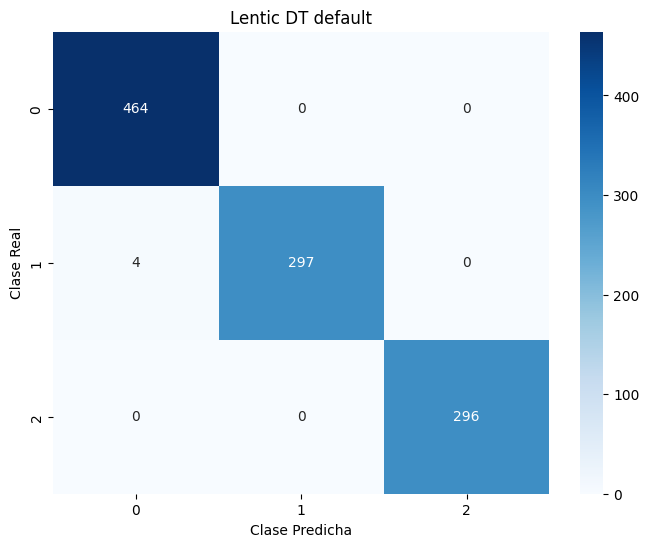

In [143]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic DT default')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [144]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_dt.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[39  0  0]
 [ 0 81  0]
 [ 0  0  6]]


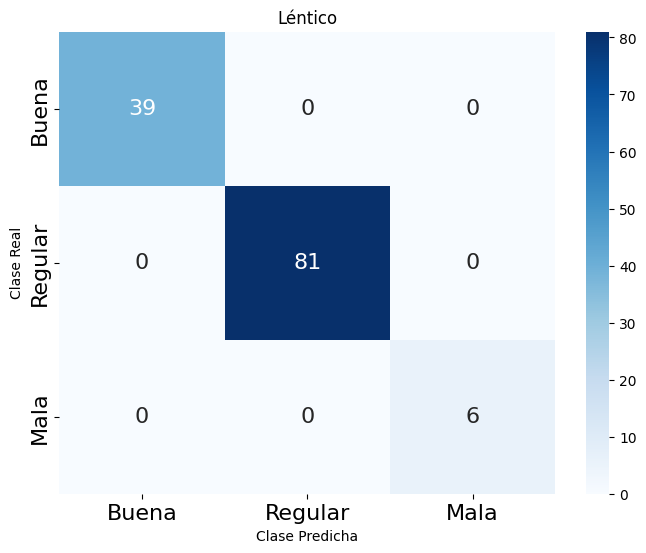

In [145]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####MLR

In [146]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_mlr = LogisticRegression(max_iter=10000)  # Usamos max_iter para evitar advertencias

# Ajustar el modelo utilizando GridSearchCV
model_lentic_mlr.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_mlr.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [147]:
# Make predictions on the training set
y_pred = model_lentic_mlr.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8903818953323904
Precision:  0.8899364505370568
Precision per class: [0.8642418  0.85996564 0.96714032]
Recall:  0.8903818953323904
Recall per class: [0.90650188 0.78881009 0.97931655]
F1 Score:  0.8894686343814558
F1-score for the class 0: 0.8848675583530029
F1-score for the class 1: 0.822852445540485
F1-score for the class 2: 0.9731903485254692
jaccard: 0.8056840179460477
Confusion Matrix: 
[[1687  159   15]
 [ 246 1001   22]
 [  19    4 1089]]


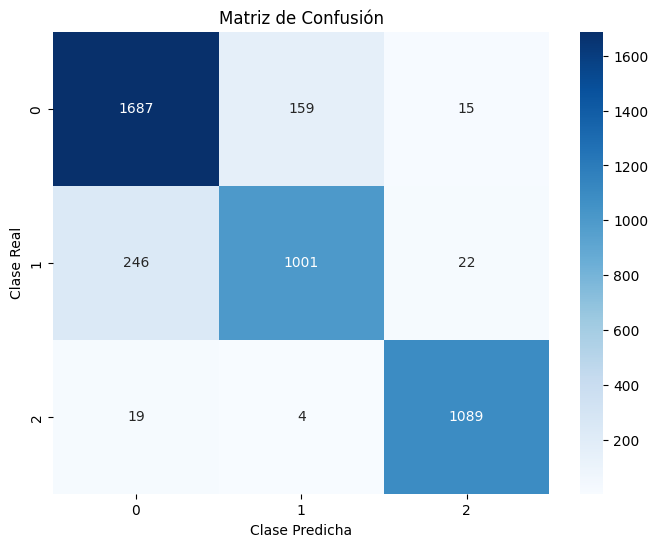

In [148]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [149]:
# Make predictions on the testing set
y_pred = model_lentic_mlr.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8755890669180019
Precision:  0.876691520583624
Precision per class: [0.83044316 0.85950413 0.96666667]
Recall:  0.8755890669180019
Recall per class: [0.92887931 0.6910299  0.97972973]
F1 Score:  0.8723271492719349
F1-score for the class 0: 0.8769074262461851
F1-score for the class 1: 0.7661141804788214
F1-score for the class 2: 0.9731543624161074
jaccard: 0.8056840179460477
Confusion Matrix: 
[[431  30   3]
 [ 86 208   7]
 [  2   4 290]]


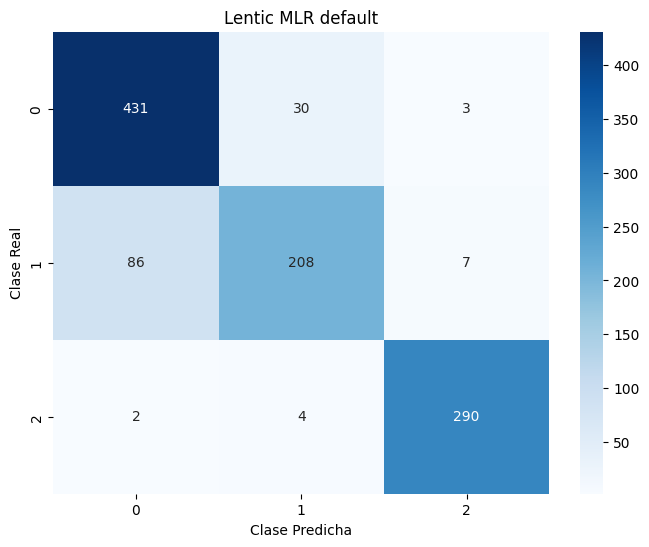

In [150]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic MLR default')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [151]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_mlr.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8253968253968254
Precision:  0.8241193447075801
Precision per class: [0.78787879 0.84705882 0.75      ]
Recall:  0.8253968253968254
Recall per class: [0.66666667 0.88888889 1.        ]
F1 Score:  0.8220205083372037
F1-score for the class 0: 0.7222222222222222
F1-score for the class 1: 0.8674698795180723
F1-score for the class 2: 0.8571428571428571
jaccard: 0.7030637416853883
Confusion Matrix: 
[[26 13  0]
 [ 7 72  2]
 [ 0  0  6]]


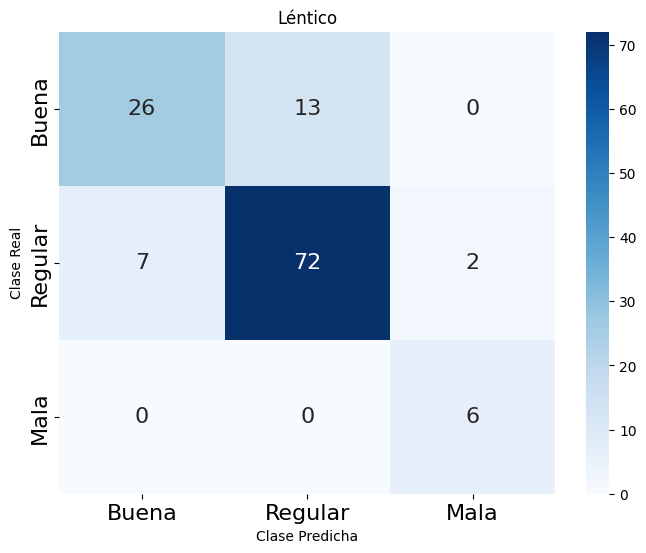

In [152]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


####Balanced classes

#####Separation of data into training and test sets

Apply random subsampling

In [153]:
print('Before class balancing: ', Counter(y_train_lentic_num))
print("")
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train_lentic_num, y_train_lentic_num)
print('After the balancing y:', Counter(y_train))
print("")
print('After the balancing X:', Counter(X_train))

Before class balancing:  Counter({0: 2325, 1: 1570, 2: 1408})

After the balancing y: Counter({0: 1408, 1: 1408, 2: 1408})

After the balancing X: Counter({'SST': 1, 'CF': 1, 'E_COLI': 1, 'ODs%': 1, 'ODm%': 1, 'ODf%': 1, 'DBO5': 1, 'DQO': 1, 'TOX_D48s': 1, 'TOX_D48f': 1, 'TOX_F15s': 1, 'TOX_F15f': 1})


In [154]:
# Guardar el conjunto de entrenamiento en un archivo Excel
#X_train_b_coa.to_excel("train_data_b_coa.xlsx", index=False)
#y_train_b_coa.to_excel("train_labels_data_b_coa.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
#X_test_b_coa.to_excel("test_data_b_coa.xlsx", index=False)
#y_test_b_coa.to_excel("test_labels_data_b_coa.xlsx", index=False)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

In [156]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
X_train.shape, X_test.shape

((3379, 12), (845, 12))

#####XGBOOST

In [158]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_xgb = XGBClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_xgb.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [159]:
# Make predictions on the training set
y_pred = model_lentic_xgb.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[1097    0    0]
 [   0 1131    0]
 [   0    0 1151]]


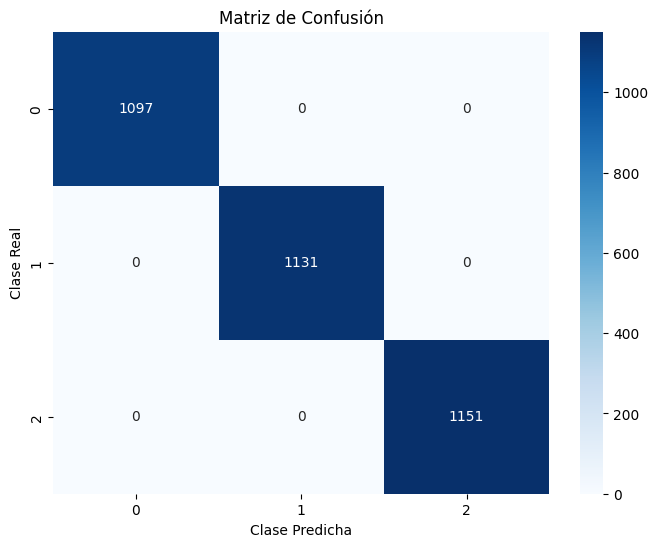

In [160]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [161]:
# Make predictions on the testing set
y_pred = model_lentic_xgb.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9952662721893492
Precision:  0.9952840625851299
Precision per class: [0.99676375 0.98924731 1.        ]
Recall:  0.9952662721893492
Recall per class: [0.9903537  0.99638989 1.        ]
F1 Score:  0.9952671510434332
F1-score for the class 0: 0.9935483870967742
F1-score for the class 1: 0.9928057553956835
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[308   3   0]
 [  1 276   0]
 [  0   0 257]]


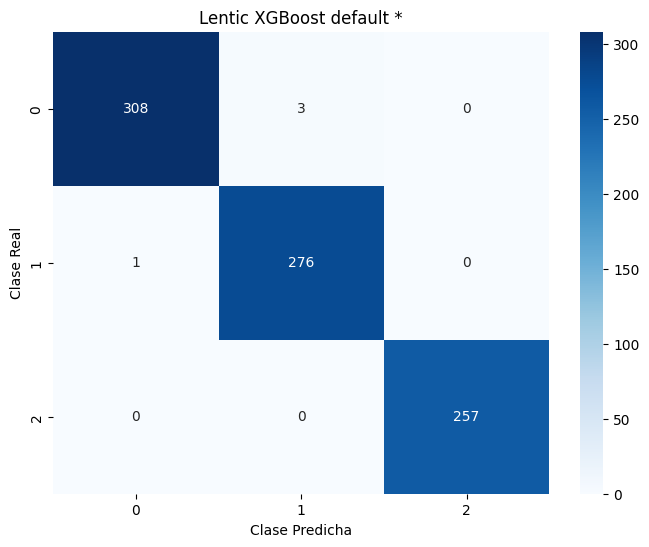

In [162]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic XGBoost default *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [163]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_xgb.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[39  0  0]
 [ 0 81  0]
 [ 0  0  6]]


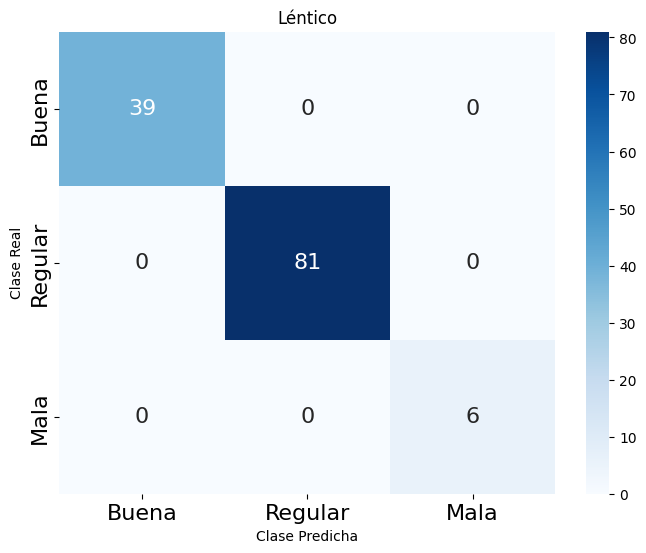

In [164]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####SVM

In [165]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_svm = SVC()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_svm.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_svm.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [166]:
# Make predictions on the training set
y_pred = model_lentic_svm.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9301568511393904
Precision:  0.9297307369983732
Precision per class: [0.9095941  0.9106345  0.96768707]
Recall:  0.9301568511393904
Recall per class: [0.89881495 0.90097259 0.98870547]
F1 Score:  0.9298862814854226
F1-score for the class 0: 0.9041723979825768
F1-score for the class 1: 0.9057777777777778
F1-score for the class 2: 0.9780833691448216
jaccard: 0.8709652148561483
Confusion Matrix: 
[[ 986   89   22]
 [  96 1019   16]
 [   2   11 1138]]


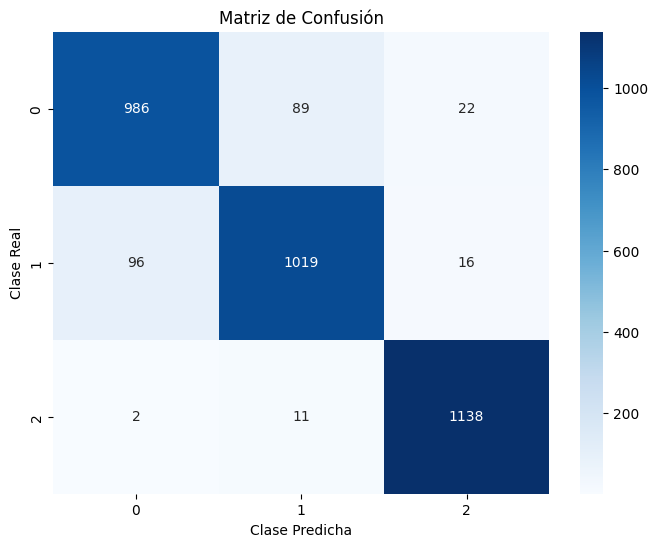

In [167]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [168]:
# Make predictions on the testing set
y_pred = model_lentic_svm.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.927810650887574
Precision:  0.9273995251310562
Precision per class: [0.92409241 0.90875912 0.95149254]
Recall:  0.927810650887574
Recall per class: [0.90032154 0.89891697 0.9922179 ]
F1 Score:  0.9274095481711256
F1-score for the class 0: 0.9120521172638436
F1-score for the class 1: 0.9038112522686026
F1-score for the class 2: 0.9714285714285714
jaccard: 0.8709652148561483
Confusion Matrix: 
[[280  23   8]
 [ 23 249   5]
 [  0   2 255]]


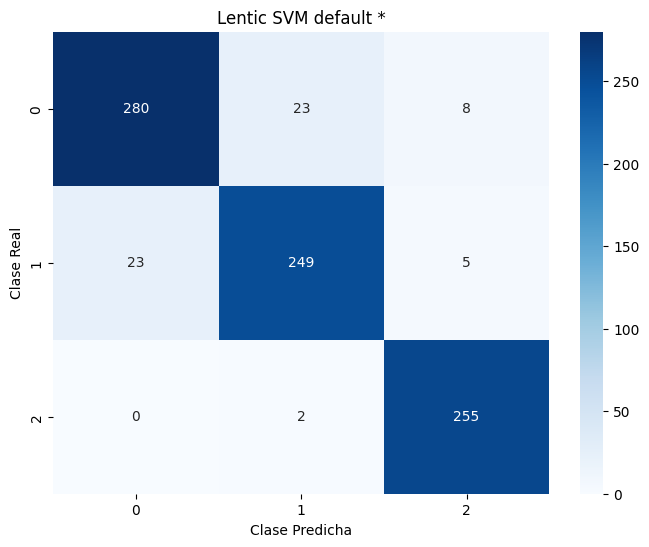

In [169]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic SVM default *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [170]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_svm.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8571428571428571
Precision:  0.8653061224489794
Precision per class: [0.85714286 0.88888889 0.6       ]
Recall:  0.8571428571428571
Recall per class: [0.76923077 0.88888889 1.        ]
F1 Score:  0.8581081081081081
F1-score for the class 0: 0.8108108108108109
F1-score for the class 1: 0.8888888888888888
F1-score for the class 2: 0.75
jaccard: 0.7538961038961038
Confusion Matrix: 
[[30  9  0]
 [ 5 72  4]
 [ 0  0  6]]


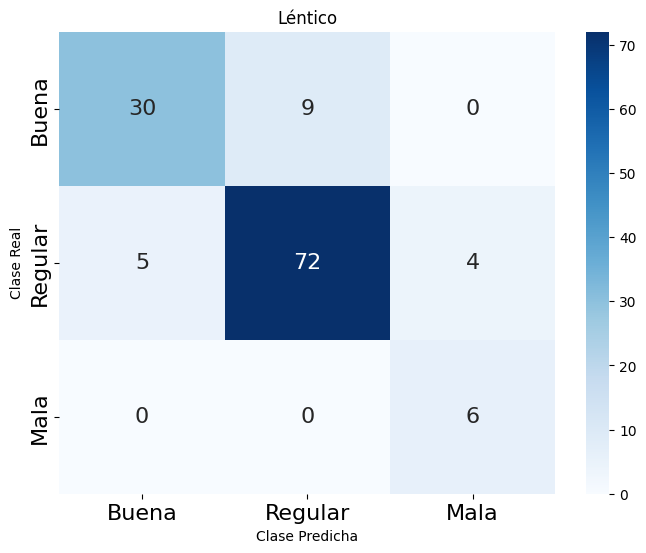

In [171]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####KNN

In [172]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_knn = KNeighborsClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_knn.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_knn.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [173]:
# Make predictions on the training set
y_pred = model_lentic_knn.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9319325244155076
Precision:  0.9334553565732391
Precision per class: [0.88907563 0.94258373 0.96678322]
Recall:  0.9319325244155076
Recall per class: [0.9644485  0.8709107  0.96090356]
F1 Score:  0.931719287942029
F1-score for the class 0: 0.9252295583734149
F1-score for the class 1: 0.9053308823529411
F1-score for the class 2: 0.963834422657952
jaccard: 0.8731567429360216
Confusion Matrix: 
[[1058   27   12]
 [ 120  985   26]
 [  12   33 1106]]


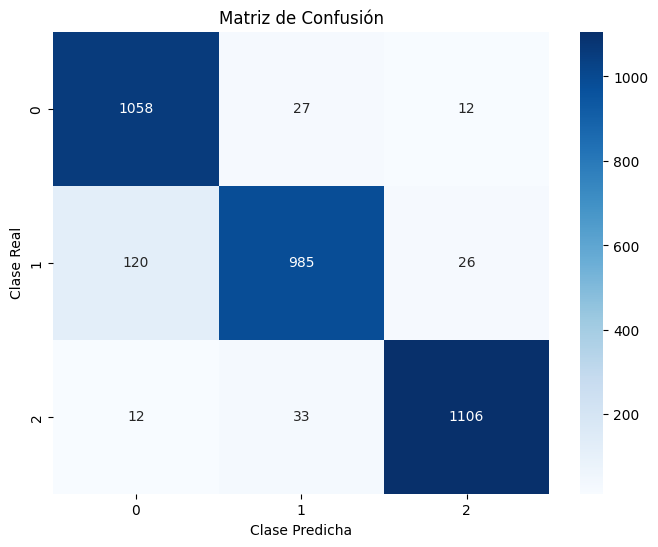

In [174]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [175]:
# Make predictions on the testing set
y_pred = model_lentic_knn.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8923076923076924
Precision:  0.8928322165343913
Precision per class: [0.87311178 0.88549618 0.92460317]
Recall:  0.8923076923076924
Recall per class: [0.92926045 0.83754513 0.90661479]
F1 Score:  0.892002469880505
F1-score for the class 0: 0.9003115264797508
F1-score for the class 1: 0.8608534322820037
F1-score for the class 2: 0.9155206286836935
jaccard: 0.8731567429360216
Confusion Matrix: 
[[289  12  10]
 [ 36 232   9]
 [  6  18 233]]


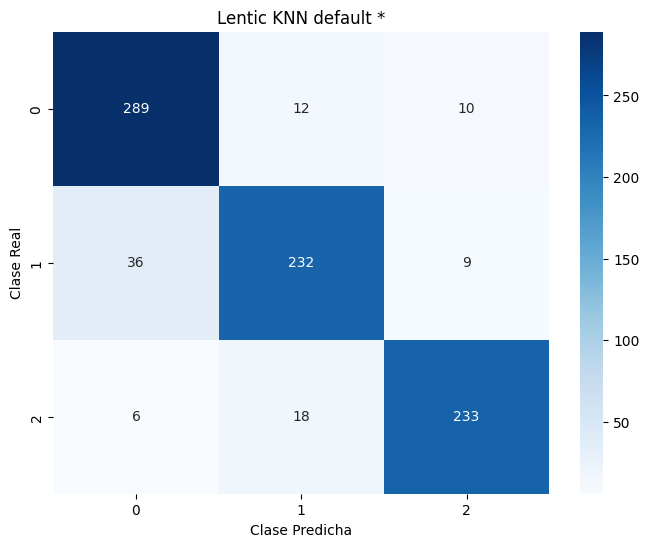

In [176]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic KNN default *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [177]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_knn.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8095238095238095
Precision:  0.8406462585034012
Precision per class: [0.775      0.90277778 0.42857143]
Recall:  0.8095238095238095
Recall per class: [0.79487179 0.80246914 1.        ]
F1 Score:  0.8177073360989966
F1-score for the class 0: 0.7848101265822784
F1-score for the class 1: 0.8496732026143791
F1-score for the class 2: 0.6
jaccard: 0.6951466192537621
Confusion Matrix: 
[[31  7  1]
 [ 9 65  7]
 [ 0  0  6]]


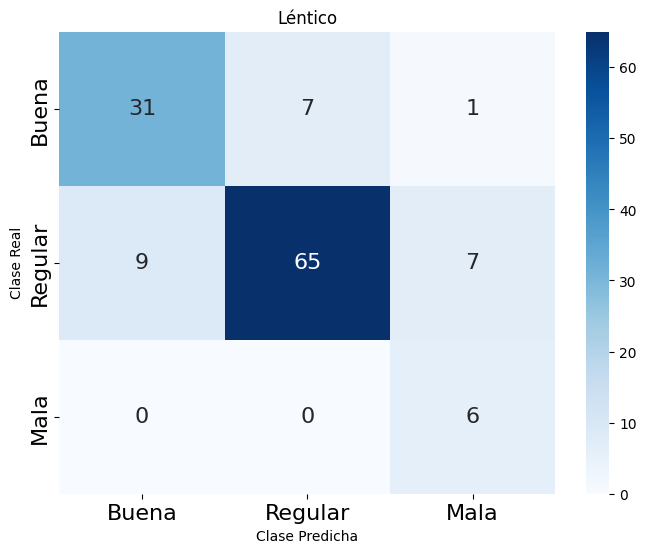

In [178]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####DT

In [179]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_dt = DecisionTreeClassifier()

# Ajustar el modelo utilizando GridSearchCV
model_lentic_dt.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_dt.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [180]:
# Make predictions on the training set
y_pred = model_lentic_dt.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[1097    0    0]
 [   0 1131    0]
 [   0    0 1151]]


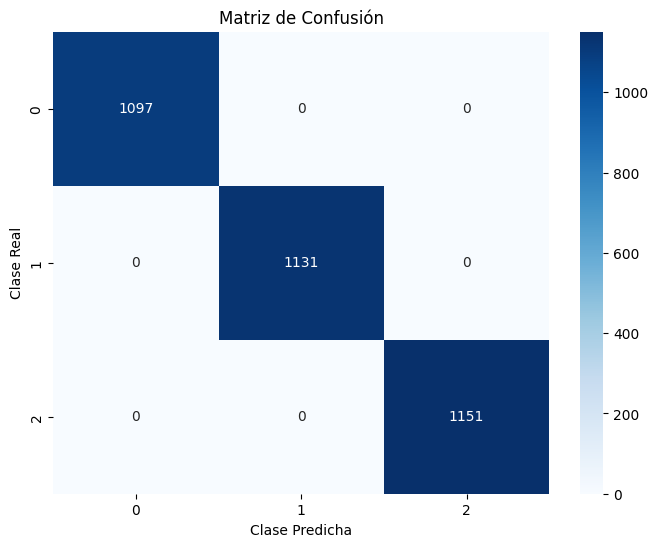

In [181]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [182]:
# Make predictions on the testing set
y_pred = model_lentic_dt.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9976331360946745
Precision:  0.9976501028610211
Precision per class: [1.         0.99283154 1.        ]
Recall:  0.9976331360946745
Recall per class: [0.99356913 1.         1.        ]
F1 Score:  0.9976335755217166
F1-score for the class 0: 0.9967741935483871
F1-score for the class 1: 0.9964028776978417
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[309   2   0]
 [  0 277   0]
 [  0   0 257]]


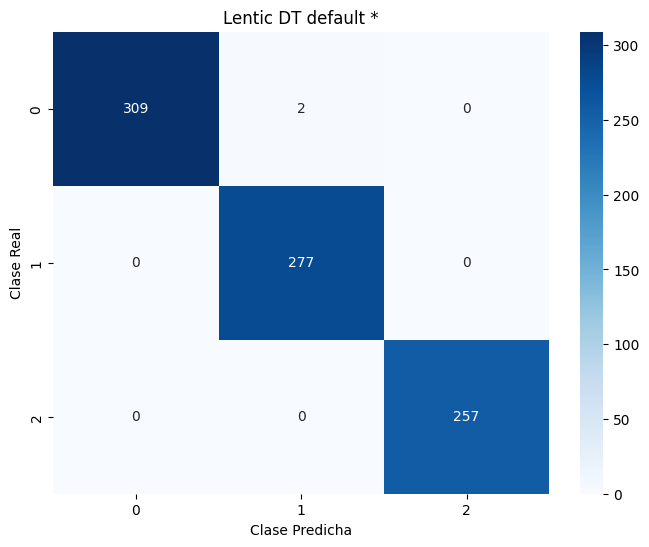

In [183]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic DT default *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [184]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_dt.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9920634920634921
Precision:  0.9921602787456446
Precision per class: [1.         0.98780488 1.        ]
Recall:  0.9920634920634921
Recall per class: [0.97435897 1.         1.        ]
F1 Score:  0.9920363014140402
F1-score for the class 0: 0.987012987012987
F1-score for the class 1: 0.9938650306748467
F1-score for the class 2: 1.0
jaccard: 0.9842237708091367
Confusion Matrix: 
[[38  1  0]
 [ 0 81  0]
 [ 0  0  6]]


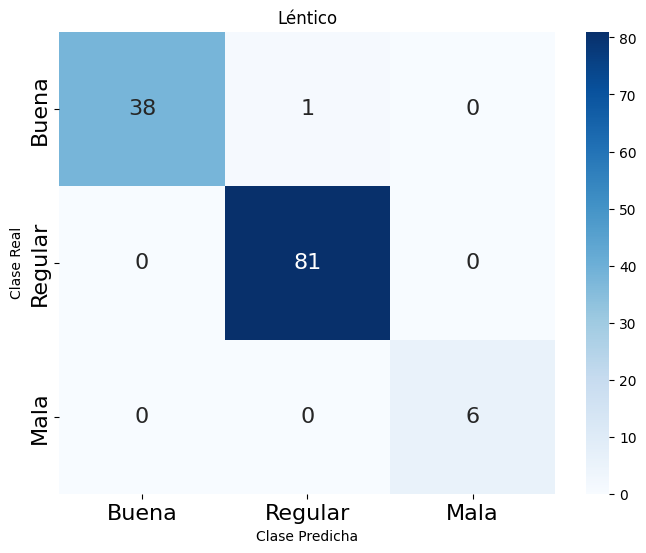

In [185]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####MLR

In [186]:
# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lentic_mlr = LogisticRegression(max_iter=10000)  # Usamos max_iter para evitar advertencias

# Ajustar el modelo utilizando GridSearchCV
model_lentic_mlr.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_lentic_mlr.predict(X_test_scaled)

print("Modelo terminado")

Wait a moment...
Modelo terminado


######Metrics

 Evaluate the model on the training set

In [187]:
# Make predictions on the training set
y_pred = model_lentic_mlr.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8819177271382066
Precision:  0.8807819738434896
Precision per class: [0.82955576 0.84692942 0.9628692 ]
Recall:  0.8819177271382066
Recall per class: [0.83409298 0.81697613 0.9913119 ]
F1 Score:  0.8811870933036213
F1-score for the class 0: 0.8318181818181818
F1-score for the class 1: 0.8316831683168316
F1-score for the class 2: 0.9768835616438356
jaccard: 0.7946845884304438
Confusion Matrix: 
[[ 915  164   18]
 [ 181  924   26]
 [   7    3 1141]]


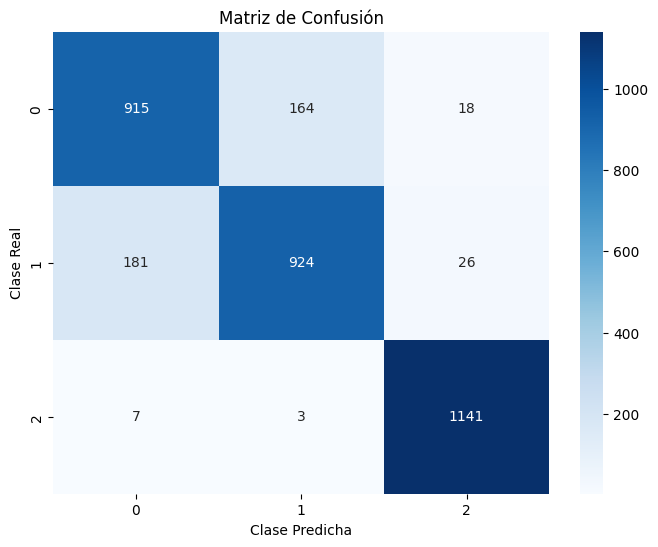

In [188]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [189]:
# Make predictions on the testing set
y_pred = model_lentic_mlr.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9005917159763314
Precision:  0.8998307075374662
Precision per class: [0.86942675 0.87265918 0.96590909]
Recall:  0.9005917159763314
Recall per class: [0.8778135  0.84115523 0.9922179 ]
F1 Score:  0.9000551296904866
F1-score for the class 0: 0.8736
F1-score for the class 1: 0.8566176470588235
F1-score for the class 2: 0.9788867562380038
jaccard: 0.7946845884304438
Confusion Matrix: 
[[273  34   4]
 [ 39 233   5]
 [  2   0 255]]


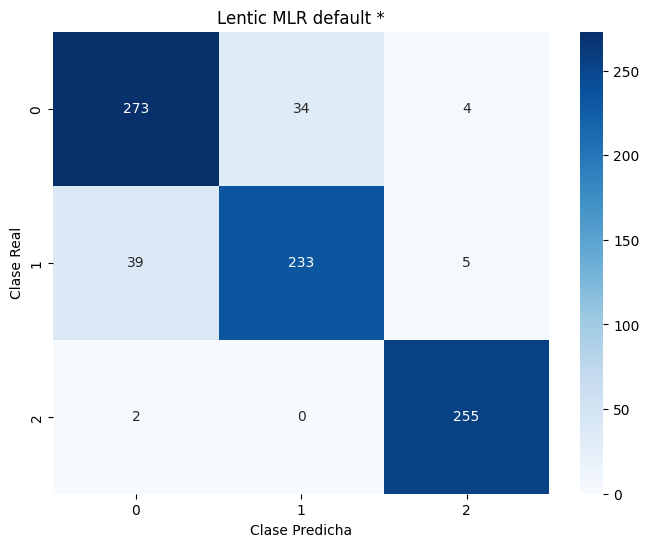

In [190]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lentic MLR default *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [191]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lentic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = model_lentic_mlr.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lentic_num, y_pred)
precision = precision_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lentic_num, y_pred, average=None)
recall = recall_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lentic_num, y_pred, average=None)
f1 = f1_score(y_val_lentic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lentic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lentic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lentic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8412698412698413
Precision:  0.846883914856265
Precision per class: [0.88461538 0.82795699 0.85714286]
Recall:  0.8412698412698413
Recall per class: [0.58974359 0.95061728 1.        ]
F1 Score:  0.8319691802450423
F1-score for the class 0: 0.7076923076923077
F1-score for the class 1: 0.8850574712643678
F1-score for the class 2: 0.9230769230769231
jaccard: 0.7206267386679758
Confusion Matrix: 
[[23 16  0]
 [ 3 77  1]
 [ 0  0  6]]


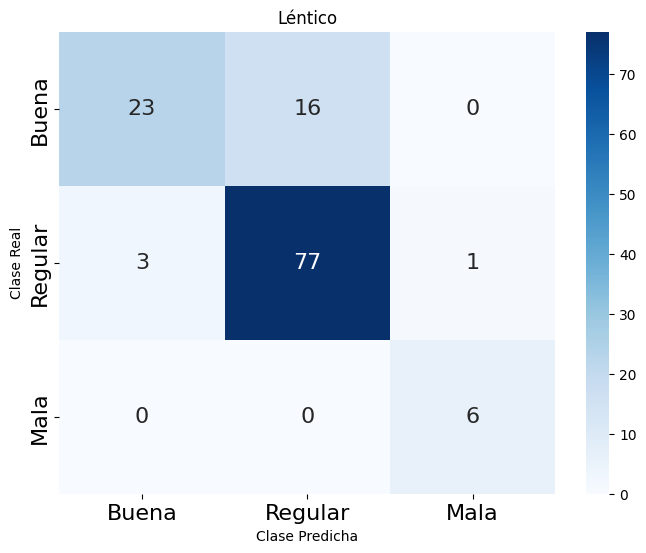

In [192]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lentic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Léntico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####Empaquetado del escalador

In [193]:
# Save the scaler used for preprocessing to a file
#with open('scaler_coa.pkl', 'wb') as scaler_file:
#    pickle.dump(scaler_coa, scaler_file)